In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df_tot = pd.read_csv('rawTrain_1.csv')
display(df_tot)
print(df_tot.keys())

,Unnamed: 0,ID,Participant,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,...,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,age,gender
0,0,0a01d6b7-465d-4c03-9362-9945629122b2,id01206,27.943003,0.124328,24.812248,26.861307,31.699125,6.886877,85.718100,...,0.047353,4.020101,3.645834,0.151429,0.079898,0.088750,0.064311,-33.909990,68.0,m
1,1,0a01d6b7-465d-4c03-9362-9945629122b2,id01206,26.467838,0.072899,24.903242,26.110186,28.646020,3.742779,171.762620,...,0.048154,6.030151,3.626943,0.197143,0.088756,0.070000,0.036968,-35.213783,68.0,m
2,2,0a01d6b7-465d-4c03-9362-9945629122b2,id01206,27.489487,0.048744,26.296910,27.341871,28.358173,2.061264,242.362470,...,0.032970,3.517588,3.125000,0.138333,0.076685,0.161667,0.229885,-34.446760,68.0,m
3,3,0a01d6b7-465d-4c03-9362-9945629122b2,id01206,26.608780,0.127619,24.208565,25.634075,30.679205,6.470640,91.653160,...,0.051809,7.035176,4.663213,0.112222,0.058267,0.082222,0.036751,-34.757946,68.0,m
4,4,0a01d6b7-465d-4c03-9362-9945629122b2,id01206,27.170237,0.127571,23.402758,27.096771,30.115894,6.713137,22.753971,...,0.062265,4.020101,2.590674,0.150000,0.104307,0.216000,0.129089,-33.650030,68.0,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12765,12765,d87c94cc-34e5-4752-b44f-8d2c7e475f42,id08356,29.890106,0.022680,29.231920,29.938593,30.394740,1.162819,39.143170,...,0.122549,4.020101,2.590674,0.292000,0.246284,0.095000,0.047170,-28.599495,31.0,f
12766,12766,d87c94cc-34e5-4752-b44f-8d2c7e475f42,id08356,30.021532,0.088315,29.047306,29.451270,30.352144,1.304838,120.608580,...,0.131618,6.030151,4.639175,0.097778,0.048023,0.095556,0.071819,-29.762573,31.0,f
12767,12767,d93b8667-95fc-470e-a467-3a5a13d87923,id04720,21.358158,0.034950,20.694593,21.378864,22.103210,1.408617,37.805107,...,0.113570,3.517588,3.108808,0.193333,0.079092,0.132000,0.143861,-29.687563,29.0,m
12768,12768,d93b8667-95fc-470e-a467-3a5a13d87923,id04720,22.622227,0.267770,21.104310,21.436493,21.865860,0.761551,20.698824,...,0.142255,4.522613,3.608248,0.161429,0.133676,0.095714,0.079437,-28.477493,29.0,m


Index(['Unnamed: 0', 'ID', 'Participant', 'F0semitoneFrom27.5Hz_sma3nz_amean',
       'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
       'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
       'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean',
       'loudness_sma3_stddevNorm', 'loudness_sma3_percentile20.0',
       'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0',
       'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanRisingSlope',
       'loudness_sma3_stddevRisingSlope', 'loudness_sma3_meanFallingSlope',
       'loudness_sma3_stddevFallingSlope', 'spectralFlux_sma3_amean',
       'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_amean',
    

In [3]:
df_tot = df_tot.dropna()


X = df_tot[['F0semitoneFrom27.5Hz_sma3nz_amean',
       'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
       'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
       'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean',
       'loudness_sma3_stddevNorm', 'loudness_sma3_percentile20.0',
       'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0',
       'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanRisingSlope',
       'loudness_sma3_stddevRisingSlope', 'loudness_sma3_meanFallingSlope',
       'loudness_sma3_stddevFallingSlope', 'spectralFlux_sma3_amean',
       'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_amean',
       'mfcc1_sma3_stddevNorm', 'mfcc2_sma3_amean', 'mfcc2_sma3_stddevNorm',
       'mfcc3_sma3_amean', 'mfcc3_sma3_stddevNorm', 'mfcc4_sma3_amean',
       'mfcc4_sma3_stddevNorm', 'jitterLocal_sma3nz_amean',
       'jitterLocal_sma3nz_stddevNorm', 'shimmerLocaldB_sma3nz_amean',
       'shimmerLocaldB_sma3nz_stddevNorm', 'HNRdBACF_sma3nz_amean',
       'HNRdBACF_sma3nz_stddevNorm', 'logRelF0-H1-H2_sma3nz_amean',
       'logRelF0-H1-H2_sma3nz_stddevNorm', 'logRelF0-H1-A3_sma3nz_amean',
       'logRelF0-H1-A3_sma3nz_stddevNorm', 'F1frequency_sma3nz_amean',
       'F1frequency_sma3nz_stddevNorm', 'F1bandwidth_sma3nz_amean',
       'F1bandwidth_sma3nz_stddevNorm', 'F1amplitudeLogRelF0_sma3nz_amean',
       'F1amplitudeLogRelF0_sma3nz_stddevNorm', 'F2frequency_sma3nz_amean',
       'F2frequency_sma3nz_stddevNorm', 'F2bandwidth_sma3nz_amean',
       'F2bandwidth_sma3nz_stddevNorm', 'F2amplitudeLogRelF0_sma3nz_amean',
       'F2amplitudeLogRelF0_sma3nz_stddevNorm', 'F3frequency_sma3nz_amean',
       'F3frequency_sma3nz_stddevNorm', 'F3bandwidth_sma3nz_amean',
       'F3bandwidth_sma3nz_stddevNorm', 'F3amplitudeLogRelF0_sma3nz_amean',
       'F3amplitudeLogRelF0_sma3nz_stddevNorm', 'alphaRatioV_sma3nz_amean',
       'alphaRatioV_sma3nz_stddevNorm', 'hammarbergIndexV_sma3nz_amean',
       'hammarbergIndexV_sma3nz_stddevNorm', 'slopeV0-500_sma3nz_amean',
       'slopeV0-500_sma3nz_stddevNorm', 'slopeV500-1500_sma3nz_amean',
       'slopeV500-1500_sma3nz_stddevNorm', 'spectralFluxV_sma3nz_amean',
       'spectralFluxV_sma3nz_stddevNorm', 'mfcc1V_sma3nz_amean',
       'mfcc1V_sma3nz_stddevNorm', 'mfcc2V_sma3nz_amean',
       'mfcc2V_sma3nz_stddevNorm', 'mfcc3V_sma3nz_amean',
       'mfcc3V_sma3nz_stddevNorm', 'mfcc4V_sma3nz_amean',
       'mfcc4V_sma3nz_stddevNorm', 'alphaRatioUV_sma3nz_amean',
       'hammarbergIndexUV_sma3nz_amean', 'slopeUV0-500_sma3nz_amean',
       'slopeUV500-1500_sma3nz_amean', 'spectralFluxUV_sma3nz_amean',
       'loudnessPeaksPerSec', 'VoicedSegmentsPerSec',
       'MeanVoicedSegmentLengthSec', 'StddevVoicedSegmentLengthSec',
       'MeanUnvoicedSegmentLength', 'StddevUnvoicedSegmentLength',
       'equivalentSoundLevel_dBp']]

y_age = df_tot[['age']]
y_gender = df_tot[['gender']]


In [4]:
# Old way of splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_age, y_test_age = train_test_split(X, y_age, test_size=0.2)
X_train, X_test, y_train_gender, y_test_gender = train_test_split(X, y_gender, test_size=0.2)

In [11]:
# to split by speaker we need to to things a bit differently
random_seed = 42
np.random.seed(random_seed)
random.seed(random_seed)

all_speakers=df_tot[['Participant']].drop_duplicates().copy()
speakers_train, speakers_test=train_test_split(all_speakers, test_size=0.2)

In [29]:
set(speakers_train.Participant).intersection(set(speakers_test.Participant)) # success

set()

In [32]:
train_df=df_tot[df_tot.Participant.isin(speakers_train.Participant)].copy()
test_df=df_tot[df_tot.Participant.isin(speakers_test.Participant)].copy()

In [33]:
set(train_df.Participant).intersection(set(test_df.Participant)) # success

set()

In [36]:
train_df.loc[:, 'F0semitoneFrom27.5Hz_sma3nz_amean':'StddevUnvoicedSegmentLength'].copy()

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength
0,27.943003,0.124328,24.812248,26.861307,31.699125,6.886877,85.718100,47.585030,38.312286,41.574722,...,19.247334,0.039615,0.001862,0.047353,4.020101,3.645834,0.151429,0.079898,0.088750,0.064311
1,26.467838,0.072899,24.903242,26.110186,28.646020,3.742779,171.762620,140.664600,16.289448,7.123185,...,16.029463,0.037199,0.000476,0.048154,6.030151,3.626943,0.197143,0.088756,0.070000,0.036968
2,27.489487,0.048744,26.296910,27.341871,28.358173,2.061264,242.362470,179.615800,24.469116,8.069482,...,17.254711,0.036088,0.006169,0.032970,3.517588,3.125000,0.138333,0.076685,0.161667,0.229885
3,26.608780,0.127619,24.208565,25.634075,30.679205,6.470640,91.653160,45.258710,26.399956,14.848991,...,9.925672,0.035638,-0.001374,0.051809,7.035176,4.663213,0.112222,0.058267,0.082222,0.036751
4,27.170237,0.127571,23.402758,27.096771,30.115894,6.713137,22.753971,0.000000,3.525636,20.071093,...,12.905887,0.051507,0.001481,0.062265,4.020101,2.590674,0.150000,0.104307,0.216000,0.129089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12765,29.890106,0.022680,29.231920,29.938593,30.394740,1.162819,39.143170,25.336927,9.849568,6.261695,...,13.903420,0.043407,-0.006865,0.122549,4.020101,2.590674,0.292000,0.246284,0.095000,0.047170
12766,30.021532,0.088315,29.047306,29.451270,30.352144,1.304838,120.608580,113.294470,62.208470,79.366295,...,17.666636,0.038030,-0.013279,0.131618,6.030151,4.639175,0.097778,0.048023,0.095556,0.071819
12767,21.358158,0.034950,20.694593,21.378864,22.103210,1.408617,37.805107,51.083930,8.725139,2.074446,...,20.690992,0.058639,-0.017630,0.113570,3.517588,3.108808,0.193333,0.079092,0.132000,0.143861
12768,22.622227,0.267770,21.104310,21.436493,21.865860,0.761551,20.698824,14.767219,341.285900,0.000000,...,18.836702,0.056221,-0.011319,0.142255,4.522613,3.608248,0.161429,0.133676,0.095714,0.079437


In [37]:
# i am leaving out equivalentSoundLevel_dBp because it is unlikely to be helpful across datasets
X_train, y_train_age, y_train_gender = train_df.loc[:, 'F0semitoneFrom27.5Hz_sma3nz_amean':'StddevUnvoicedSegmentLength'].copy(), train_df[['age']].copy(), train_df[['gender']].copy()
X_test, y_test_age, y_test_gender = test_df.loc[:, 'F0semitoneFrom27.5Hz_sma3nz_amean':'StddevUnvoicedSegmentLength'].copy(), test_df[['age']].copy(), test_df[['gender']].copy()

In [ ]:
# another thing - a lot of these variables are probable colinear, so could do PCA becaore predicting

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
preprocessing_pipeline=Pipeline([('imputer',SimpleImputer()),('scaler', StandardScaler()), ('pca', PCA(n_components=20, whiten=True))])

In [99]:
preprocessing_pipeline.fit(X_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('pca', PCA(n_components=20, whiten=True))])

In [100]:
X_train_preprocessed=preprocessing_pipeline.transform(X_train)
X_test_preprocessed=preprocessing_pipeline.transform(X_test)

In [101]:
X_train_preprocessed.shape

(10107, 20)

In [102]:
y_train_gender.loc[y_train_gender['gender']=='m', 'gender'] = 0
y_train_gender.loc[y_train_gender['gender']=='f', 'gender'] = 1
y_test_gender.loc[y_test_gender['gender']=='m', 'gender'] = 0
y_test_gender.loc[y_test_gender['gender']=='f', 'gender'] = 1

In [103]:
# example model
from sklearn.svm import SVC, SVR

age_model=SVR(kernel='rbf', C=10, epsilon=0.1)

In [104]:
age_model.fit(X_train_preprocessed,y_train_age['age'])

SVR(C=10)

In [105]:
age_model.score(X_train_preprocessed,y_train_age['age'])

0.4110228298302525

In [106]:
y_train_age_pred=age_model.predict(X_train_preprocessed)

In [107]:
pred_frame=pd.DataFrame(data={'age_true': y_train_age['age'], 'age_pred':y_train_age_pred})

<AxesSubplot:xlabel='age_true', ylabel='age_pred'>

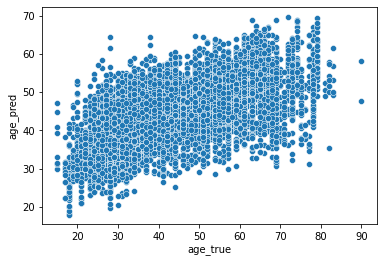

In [108]:
sns.scatterplot(data=pred_frame, x="age_true", y="age_pred")

<AxesSubplot:xlabel='age_true', ylabel='age_pred'>

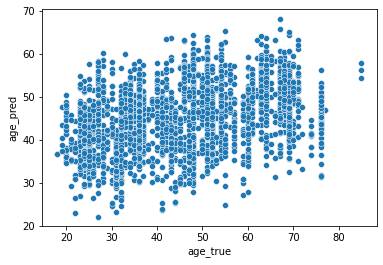

In [109]:
y_test_age_pred=age_model.predict(X_test_preprocessed)
pred_frame=pd.DataFrame(data={'age_true': y_test_age['age'], 'age_pred':y_test_age_pred})
sns.scatterplot(data=pred_frame, x="age_true", y="age_pred")

In [110]:
age_model.score(X_test_preprocessed,y_test_age['age']) # much worse, obviously, but it's learning something at least.

0.12358149525708995

In [ ]:
# can consider e.g. only using one sample per speaker in train, or a handful rather than all etc.

In [ ]:
# Make above code split based on participant, not utterances

In [ ]:
scaler = preprocessing.StandardScaler().fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# convert m and f to 0 and 1 respectively --> m = 0 and f = 1
y_train_gender.loc[y_train_gender['gender']=='m', 'gender'] = 0
y_train_gender.loc[y_train_gender['gender']=='f', 'gender'] = 1
print(list(y_train_gender['gender']))

y_test_gender.loc[y_test_gender['gender']=='m', 'gender'] = 0
y_test_gender.loc[y_test_gender['gender']=='f', 'gender'] = 1
print(list(y_test_gender['gender']))

[0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 

Linear Regression to Predict Age

In [ ]:
from sklearn.linear_model import LinearRegression

model_age = LinearRegression()
model_age.fit(X_train, y_train_age)
# ŷ = β0 + β1(x1) + β2(x2) + β3(x3) + … + βk(xk)
# y = age, and x1, x2, x3 = x variables in order that they were listed in X variable

# this gives β1, β2, ..., βk
print(model_age.coef_)
# this gives β0
print(model_age.intercept_)

[[-5.39721545e-02  1.65775443e-01 -4.67922336e+05 -7.16817496e-02
   5.10863117e+05 -2.63470119e+05 -3.75446378e-01  6.17536388e-02
  -5.45163546e-02  2.22708559e-01 -1.29139868e+00 -2.51161469e-01
  -1.11262201e+06  4.45287250e-01  2.39422549e+06 -1.59603027e+06
  -9.24883378e-01  3.65072425e-01  2.33702116e-01  3.36951837e-01
   5.58838073e-01  4.82112630e-01 -1.07278466e-01 -1.96531600e-01
   8.55491718e-01  2.06706928e+00 -2.99291700e-01 -1.77177578e-01
  -1.05796383e+00 -4.67197289e-01 -2.55366547e-01  9.01002674e-02
  -8.00773496e-02  8.42345932e-02 -8.39129800e-01  2.35578469e-01
  -2.17103705e-01 -4.02492639e-02  7.52192222e-01  1.21790733e-01
  -3.51797547e-01 -2.87438278e-01 -5.39407430e-01  2.17325057e-01
   1.00703406e-01  1.30587267e-01 -6.78291228e-02  1.72474605e-02
   1.40501740e-01  1.77297167e-01 -8.32749195e-01 -2.07746747e-01
   2.18165232e-01 -3.02539410e-01  5.00569189e-02 -1.64874978e-01
   1.32536943e+00  7.05293022e-01 -7.42631993e-01  1.21971826e-01
  -7.07418

In [ ]:
true_age = []
for i in y_test_age["age"]:
  true_age.append(i)
print(true_age)

[57.0, 68.0, 26.0, 66.0, 48.0, 56.0, 39.0, 45.0, 44.0, 38.0, 57.0, 33.0, 69.0, 43.0, 45.0, 63.0, 59.0, 21.0, 47.0, 31.0, 58.0, 41.0, 54.0, 36.0, 47.0, 39.0, 39.0, 57.0, 30.0, 63.0, 48.0, 33.0, 34.0, 69.0, 26.0, 51.0, 67.0, 54.0, 28.0, 33.0, 25.0, 60.0, 52.0, 60.0, 63.0, 59.0, 52.0, 50.0, 29.0, 59.0, 30.0, 51.0, 54.0, 46.0, 34.0, 58.0, 40.0, 55.0, 43.0, 39.0, 44.0, 32.0, 51.0, 20.0, 56.0, 54.0, 69.0, 34.0, 48.0, 42.0, 51.0, 40.0, 51.0, 30.0, 35.0, 55.0, 41.0, 65.0, 18.0, 50.0, 32.0, 56.0, 46.0, 53.0, 56.0, 63.0, 36.0, 54.0, 63.0, 60.0, 63.0, 56.0, 59.0, 31.0, 53.0, 25.0, 59.0, 61.0, 42.0, 59.0, 43.0, 49.0, 50.0, 61.0, 24.0, 44.0, 50.0, 57.0, 49.0, 30.0, 59.0, 51.0, 55.0, 52.0, 49.0, 33.0, 44.0, 40.0, 38.0, 69.0, 52.0, 26.0, 50.0, 25.0, 37.0, 46.0, 44.0, 43.0, 47.0, 32.0, 31.0, 34.0, 65.0, 54.0, 34.0, 59.0, 65.0, 51.0, 59.0, 43.0, 38.0, 63.0, 67.0, 75.0, 29.0, 35.0, 32.0, 35.0, 26.0, 31.0, 42.0, 27.0, 67.0, 35.0, 30.0, 22.0, 28.0, 54.0, 50.0, 37.0, 24.0, 22.0, 52.0, 43.0, 54.0, 54.0, 23.

[[44.99515894]
 [46.6746128 ]
 [47.91663921]
 ...
 [44.91898796]
 [46.69480562]
 [45.58101589]]
[44.99515894173136, 46.67461279759105, 47.91663921353364, 46.82460935544444, 48.28197071849071, 44.886713554338925, 45.2067449651955, 47.078137790094715, 46.96890221700647, 45.675329606769736, 46.766129637678276, 45.53677206141089, 43.79002693403676, 46.62357586351317, 46.668571486186515, 46.624620943379725, 47.941816337460594, 47.491462362626386, 48.353184751526555, 46.31573343513635, 46.703121465196745, 47.17344592906625, 44.55171604771918, 45.49112411175332, 47.06127126186706, 46.09876748298153, 46.748382690495205, 44.78634313633554, 46.663913803547956, 46.54604324356563, 47.031502575232416, 47.20618131310179, 50.7704770558367, 46.97845165228401, 48.06490822871041, 45.25829709096066, 46.43299176422423, 45.03905339047279, 43.81195695645735, 46.40174804468428, 47.050316388853425, 44.513504865647555, 44.82029204140605, 46.82086995990982, 46.680020996067604, 46.529386215187735, 46.96893315118

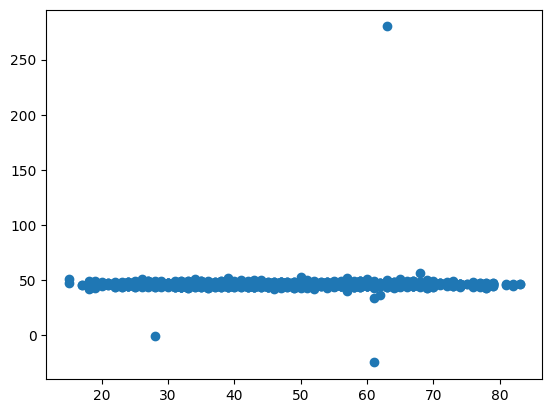

In [ ]:
predictions_age = model_age.predict(X_test)

predictions_age_int = []
for i in predictions_age:
  predictions_age_int.append(round(float(i)))

print(predictions_age)

predictions_age_list = []
for i in predictions_age:
  predictions_age_list.append(float(i))

print(predictions_age_list)



print(true_age)
print(predictions_age_int)

display(plt.scatter(y_test_age, predictions_age))

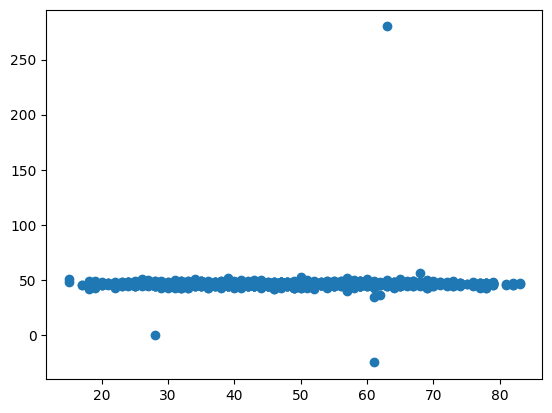

In [ ]:
display(plt.scatter(y_test_age, predictions_age_int))

In [ ]:
from scipy.stats import pearsonr
rsq, p = pearsonr(true_age, predictions_age_list)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(true_age, predictions_age_list)
print(rsq, p)

0.009455856990544464 0.632900423587834
-0.04195630511313967 0.03398528641630364


In [ ]:
from scipy.stats import pearsonr
rsq, p = pearsonr(true_age, predictions_age_int)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(true_age, predictions_age_int)
print(rsq, p)

0.011069636954294061 0.5760451687477626
-0.03520643768224284 0.07525415029915825


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        9.810e+02, 1.477e+03, 9.300e+01, 1.000e+00]),
 array([-217.08883496, -186.79930088, -156.5097668 , -126.22023272,
         -95.93069864,  -65.64116456,  -35.35163048,   -5.0620964 ,
          25.22743768,   55.51697176,   85.80650584]),
 <BarContainer object of 10 artists>)

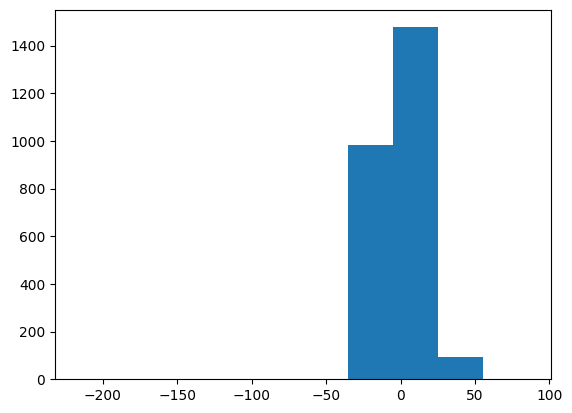

In [ ]:
plt.hist(y_test_age - predictions_age)

In [ ]:
from sklearn import metrics
# MAE
print(metrics.mean_absolute_error(y_test_age, predictions_age))
# MSE
print(metrics.mean_squared_error(y_test_age, predictions_age))
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test_age, predictions_age)))

12.028082724416606
223.73055150900055
14.957625196166688


In [ ]:
from sklearn import metrics
# MAE
print(metrics.mean_absolute_error(y_test_age, predictions_age_int))
# MSE
print(metrics.mean_squared_error(y_test_age, predictions_age_int))
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test_age, predictions_age_int)))

12.018794048551293
223.5716523101018
14.952312607423034


[12, 21, 21, 19, 0, 11, 6, 2, 2, 7, 10, 12, 25, 3, 1, 16, 11, 26, 1, 15, 11, 6, 9, 9, 0, 7, 7, 12, 16, 16, 0, 14, 16, 22, 22, 5, 20, 8, 15, 13, 22, 15, 7, 13, 16, 12, 5, 4, 16, 13, 15, 5, 7, 0, 11, 12, 6, 9, 2, 8, 1, 15, 5, 25, 10, 9, 22, 11, 2, 3, 5, 6, 5, 15, 11, 8, 2, 19, 28, 4, 17, 8, 0, 7, 9, 15, 9, 8, 15, 15, 17, 11, 14, 15, 7, 20, 10, 15, 3, 13, 3, 1, 3, 16, 20, 1, 4, 11, 2, 17, 13, 6, 9, 5, 3, 13, 0, 5, 8, 23, 8, 21, 4, 20, 10, 0, 1, 4, 1, 13, 12, 11, 20, 10, 11, 13, 19, 8, 13, 5, 8, 17, 21, 28, 16, 10, 14, 10, 20, 15, 5, 20, 21, 13, 15, 21, 18, 8, 5, 9, 24, 23, 6, 0, 9, 6, 23, 12, 12, 10, 7, 9, 1, 2, 5, 21, 21, 12, 4, 1, 7, 8, 13, 4, 7, 21, 5, 4, 14, 4, 11, 4, 5, 15, 10, 13, 6, 19, 22, 10, 6, 18, 8, 15, 0, 4, 16, 18, 13, 8, 10, 6, 22, 5, 12, 16, 18, 1, 19, 16, 10, 3, 13, 7, 17, 3, 17, 12, 0, 2, 5, 1, 6, 13, 7, 4, 5, 0, 85, 31, 1, 7, 30, 2, 7, 8, 21, 1, 2, 28, 20, 6, 3, 2, 6, 15, 25, 37, 3, 17, 16, 2, 20, 3, 9, 4, 13, 14, 1, 9, 0, 16, 0, 0, 10, 10, 20, 22, 22, 11, 15, 5, 18, 2,

0.09920302064916592 5.077118681386422e-07
0.011932094239796201 0.5466817492817482


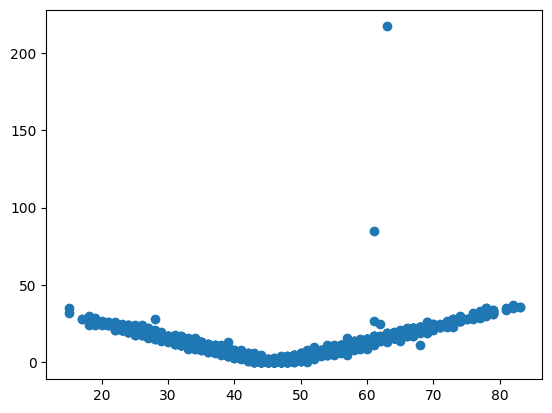

In [ ]:
age_gap = []
l = len(list(predictions_age))
for i in range(l):
  age_gap.append(int(abs(predictions_age[i] - list(y_test_age['age'])[i])))
print(age_gap)

display(plt.scatter(y_test_age, age_gap))

from scipy.stats import pearsonr
rsq, p = pearsonr(list(y_test_age['age']), age_gap)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(list(y_test_age['age']), age_gap)
print(rsq, p)

In [ ]:
import pickle
from google.colab import files

with open("LinearRegressionAge.pkl", "wb") as f:
    pickle.dump(model_age, f)
    files.download("LinearRegressionAge.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Logistic Regression to Predict Age

In [ ]:
from sklearn.linear_model import LogisticRegression
model_age = LogisticRegression()
model_age.fit(X_train, y_train_age)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions_age = model_age.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
classification_report(y_test_age, predictions_age)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n        15.0       0.00      0.00      0.00         2\n        17.0       0.00      0.00      0.00         2\n        18.0       0.00      0.00      0.00        10\n        19.0       0.00      0.00      0.00         7\n        20.0       0.00      0.00      0.00        10\n        21.0       0.00      0.00      0.00         8\n        22.0       0.00      0.00      0.00        23\n        23.0       0.00      0.00      0.00        30\n        24.0       0.00      0.00      0.00        35\n        25.0       0.00      0.00      0.00        46\n        26.0       0.00      0.00      0.00        29\n        27.0       0.00      0.00      0.00        43\n        28.0       0.02      0.02      0.02        45\n        29.0       0.06      0.03      0.04        31\n        30.0       0.00      0.00      0.00        35\n        31.0       0.02      0.01      0.02        70\n        32.0       0.03      0.02      0.03        81\n       

In [ ]:
from sklearn.metrics import confusion_matrix
print(list(y_test_age['age']))
print(list(predictions_age))

[57.0, 68.0, 26.0, 66.0, 48.0, 56.0, 39.0, 45.0, 44.0, 38.0, 57.0, 33.0, 69.0, 43.0, 45.0, 63.0, 59.0, 21.0, 47.0, 31.0, 58.0, 41.0, 54.0, 36.0, 47.0, 39.0, 39.0, 57.0, 30.0, 63.0, 48.0, 33.0, 34.0, 69.0, 26.0, 51.0, 67.0, 54.0, 28.0, 33.0, 25.0, 60.0, 52.0, 60.0, 63.0, 59.0, 52.0, 50.0, 29.0, 59.0, 30.0, 51.0, 54.0, 46.0, 34.0, 58.0, 40.0, 55.0, 43.0, 39.0, 44.0, 32.0, 51.0, 20.0, 56.0, 54.0, 69.0, 34.0, 48.0, 42.0, 51.0, 40.0, 51.0, 30.0, 35.0, 55.0, 41.0, 65.0, 18.0, 50.0, 32.0, 56.0, 46.0, 53.0, 56.0, 63.0, 36.0, 54.0, 63.0, 60.0, 63.0, 56.0, 59.0, 31.0, 53.0, 25.0, 59.0, 61.0, 42.0, 59.0, 43.0, 49.0, 50.0, 61.0, 24.0, 44.0, 50.0, 57.0, 49.0, 30.0, 59.0, 51.0, 55.0, 52.0, 49.0, 33.0, 44.0, 40.0, 38.0, 69.0, 52.0, 26.0, 50.0, 25.0, 37.0, 46.0, 44.0, 43.0, 47.0, 32.0, 31.0, 34.0, 65.0, 54.0, 34.0, 59.0, 65.0, 51.0, 59.0, 43.0, 38.0, 63.0, 67.0, 75.0, 29.0, 35.0, 32.0, 35.0, 26.0, 31.0, 42.0, 27.0, 67.0, 35.0, 30.0, 22.0, 28.0, 54.0, 50.0, 37.0, 24.0, 22.0, 52.0, 43.0, 54.0, 54.0, 23.

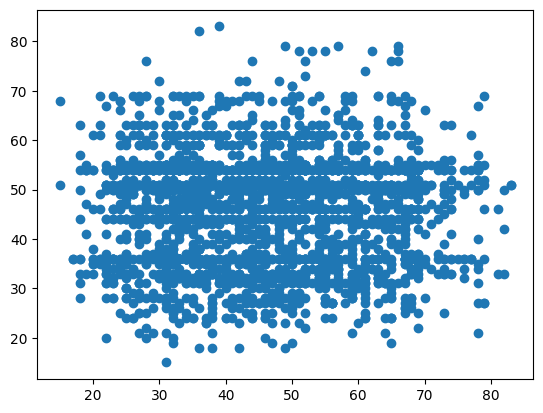

In [ ]:
display(plt.scatter(y_test_age, predictions_age))

In [ ]:
from scipy.stats import pearsonr
rsq, p = pearsonr(list(y_test_age['age']), list(predictions_age))
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(list(y_test_age['age']), list(predictions_age))
print(rsq, p)

0.004280274202069792 0.8288257685230596
-0.0002881315677256945 0.9883878303782618


In [ ]:
from sklearn import metrics
# MAE
print(metrics.mean_absolute_error(y_test_age, predictions_age))
# MSE
print(metrics.mean_squared_error(y_test_age, predictions_age))
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test_age, predictions_age)))

14.524667188723571
319.56538762725137
17.876391907408255


[21.0, 17.0, 23.0, 12.0, 12.0, 17.0, 44.0, 9.0, 12.0, 12.0, 26.0, 32.0, 19.0, 6.0, 6.0, 14.0, 5.0, 40.0, 8.0, 30.0, 9.0, 18.0, 13.0, 15.0, 7.0, 29.0, 21.0, 2.0, 2.0, 0.0, 3.0, 3.0, 17.0, 18.0, 10.0, 3.0, 24.0, 18.0, 3.0, 21.0, 22.0, 3.0, 2.0, 1.0, 27.0, 9.0, 3.0, 13.0, 22.0, 16.0, 7.0, 1.0, 21.0, 11.0, 2.0, 22.0, 13.0, 20.0, 9.0, 8.0, 9.0, 12.0, 0.0, 13.0, 29.0, 4.0, 15.0, 10.0, 18.0, 21.0, 10.0, 10.0, 1.0, 5.0, 8.0, 9.0, 14.0, 41.0, 36.0, 21.0, 4.0, 1.0, 4.0, 7.0, 5.0, 2.0, 25.0, 8.0, 20.0, 9.0, 9.0, 29.0, 4.0, 3.0, 15.0, 15.0, 12.0, 29.0, 2.0, 5.0, 8.0, 30.0, 1.0, 30.0, 26.0, 8.0, 23.0, 13.0, 21.0, 6.0, 5.0, 19.0, 23.0, 1.0, 12.0, 3.0, 12.0, 4.0, 16.0, 21.0, 20.0, 24.0, 1.0, 11.0, 15.0, 8.0, 12.0, 20.0, 14.0, 19.0, 5.0, 16.0, 23.0, 0.0, 15.0, 23.0, 31.0, 22.0, 31.0, 8.0, 16.0, 29.0, 25.0, 24.0, 0.0, 16.0, 1.0, 7.0, 17.0, 15.0, 12.0, 13.0, 2.0, 13.0, 3.0, 12.0, 23.0, 20.0, 5.0, 15.0, 26.0, 14.0, 10.0, 15.0, 18.0, 2.0, 46.0, 6.0, 16.0, 5.0, 9.0, 1.0, 7.0, 20.0, 2.0, 2.0, 42.0, 11.0, 18

0.08327260540612894 2.5131352380697935e-05
0.0246401794293537 0.21319682963384035


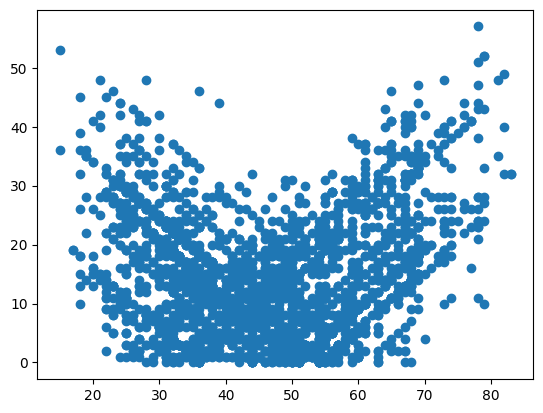

In [ ]:
age_gap = []
l = len(list(predictions_age))
for i in range(l):
  age_gap.append(abs(predictions_age[i] - list(y_test_age['age'])[i]))
print(age_gap)

display(plt.scatter(y_test_age, age_gap))

from scipy.stats import pearsonr
rsq, p = pearsonr(true_age, age_gap)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(true_age, age_gap)
print(rsq, p)

In [ ]:
import pickle
from google.colab import files

with open("LogisticRegressionAge.pkl", "wb") as f:
    pickle.dump(model_age, f)
    files.download("LogisticRegressionAge.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Binary Classification Gender

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

In [ ]:
inputs = ['F0semitoneFrom27.5Hz_sma3nz_amean',
       'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
       'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
       'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean',
       'loudness_sma3_stddevNorm', 'loudness_sma3_percentile20.0',
       'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0',
       'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanRisingSlope',
       'loudness_sma3_stddevRisingSlope', 'loudness_sma3_meanFallingSlope',
       'loudness_sma3_stddevFallingSlope', 'jitterLocal_sma3nz_amean',
       'jitterLocal_sma3nz_stddevNorm', 'shimmerLocaldB_sma3nz_amean',
       'shimmerLocaldB_sma3nz_stddevNorm', 'HNRdBACF_sma3nz_amean',
       'HNRdBACF_sma3nz_stddevNorm', 'logRelF0-H1-H2_sma3nz_amean',
       'logRelF0-H1-H2_sma3nz_stddevNorm', 'logRelF0-H1-A3_sma3nz_amean',
       'logRelF0-H1-A3_sma3nz_stddevNorm', 'F1frequency_sma3nz_amean',
       'F1frequency_sma3nz_stddevNorm', 'F1bandwidth_sma3nz_amean',
       'F1bandwidth_sma3nz_stddevNorm', 'F1amplitudeLogRelF0_sma3nz_amean',
       'F1amplitudeLogRelF0_sma3nz_stddevNorm', 'F2frequency_sma3nz_amean',
       'F2frequency_sma3nz_stddevNorm', 'F2amplitudeLogRelF0_sma3nz_amean',
       'F2amplitudeLogRelF0_sma3nz_stddevNorm', 'F3frequency_sma3nz_amean',
       'F3frequency_sma3nz_stddevNorm', 'F3amplitudeLogRelF0_sma3nz_amean',
       'F3amplitudeLogRelF0_sma3nz_stddevNorm', 'alphaRatioV_sma3nz_amean',
       'alphaRatioV_sma3nz_stddevNorm', 'hammarbergIndexV_sma3nz_amean',
       'hammarbergIndexV_sma3nz_stddevNorm', 'slopeV0-500_sma3nz_amean',
       'slopeV0-500_sma3nz_stddevNorm', 'slopeV500-1500_sma3nz_amean',
       'slopeV500-1500_sma3nz_stddevNorm', 'alphaRatioUV_sma3nz_amean',
       'hammarbergIndexUV_sma3nz_amean', 'slopeUV0-500_sma3nz_amean',
       'slopeUV500-1500_sma3nz_amean', 'loudnessPeaksPerSec',
       'VoicedSegmentsPerSec', 'MeanVoicedSegmentLengthSec',
       'StddevVoicedSegmentLengthSec', 'MeanUnvoicedSegmentLength',
       'StddevUnvoicedSegmentLength']

In [ ]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_gender = tf.convert_to_tensor(y_train_gender, dtype=tf.float32)

model_gender = Sequential()
model_gender.add(Dense(units=16, activation='relu', input_shape=(len(inputs),)))
model_gender.add(Dense(1, activation='sigmoid'))
adam = keras.optimizers.Adam(learning_rate=0.001)
model_gender.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])
model_gender.fit(X_train, y_train_gender, epochs=100)

Epoch 1/100
320/320 [==============================] - 2s 4ms/step - loss: 0.3716 - accuracy: 0.8438
Epoch 2/100
320/320 [==============================] - 1s 3ms/step - loss: 0.2443 - accuracy: 0.9076
Epoch 3/100
320/320 [==============================] - 1s 3ms/step - loss: 0.2221 - accuracy: 0.9149
Epoch 4/100
320/320 [==============================] - 1s 3ms/step - loss: 0.2110 - accuracy: 0.9189
Epoch 5/100
320/320 [==============================] - 1s 3ms/step - loss: 0.2038 - accuracy: 0.9232
Epoch 6/100
320/320 [==============================] - 1s 3ms/step - loss: 0.1975 - accuracy: 0.9266
Epoch 7/100
320/320 [==============================] - 1s 3ms/step - loss: 0.1935 - accuracy: 0.9277
Epoch 8/100
320/320 [==============================] - 1s 3ms/step - loss: 0.1902 - accuracy: 0.9298
Epoch 9/100
320/320 [==============================] - 1s 3ms/step - loss: 0.1867 - accuracy: 0.9305
Epoch 10/100
320/320 [==============================] - 1s 2ms/step - loss: 0.1844 - accura

In [ ]:
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test_gender = tf.convert_to_tensor(y_test_gender, dtype=tf.float32)

loss_and_metrics = model_gender.evaluate(X_test, y_test_gender)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

80/80 [==============================] - 0s 2ms/step - loss: 0.2335 - accuracy: 0.9127
[0.23345670104026794, 0.9126859903335571]
Loss =  0.23345670104026794
Accuracy =  0.9126859903335571


80/80 [==============================] - 0s 2ms/step


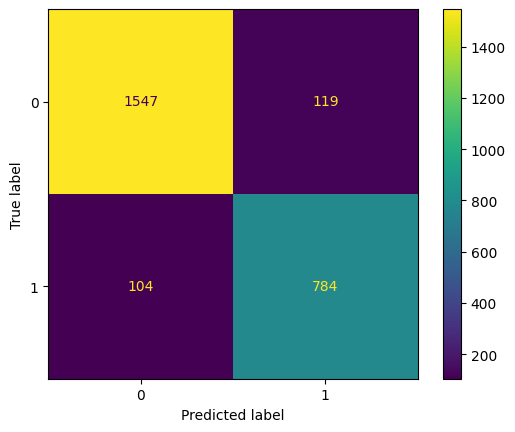

In [ ]:
predicted_gender = model_gender.predict(X_test)
predicted_gender = tf.squeeze(predicted_gender)
predicted_gender = np.array([1 if x >= 0.5 else 0 for x in predicted_gender])
actual = np.array(y_test_gender)
conf_mat = confusion_matrix(actual, predicted_gender)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [ ]:
import pickle
from google.colab import files

with open("BinaryClassificationGender.pkl", "wb") as f:
    pickle.dump(model_gender, f)
    files.download("BinaryClassificationGender.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Deep Learning Regression for Age

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))
print(normalizer.mean.numpy())

[[-3.7091121e-03  7.6412978e-03 -5.4991357e-03 -3.7834945e-03
  -1.9409880e-03  6.0029356e-03 -7.0694421e-04  9.2236098e-04
  -2.7596720e-03 -1.5032530e-03 -4.1940329e-03 -3.7023297e-03
  -2.1732890e-03 -3.1771287e-03 -5.3533395e-03 -6.5155649e-03
  -6.7478600e-03 -9.1700377e-03 -4.6818989e-04 -2.8393939e-03
  -1.1473870e-03 -2.7153185e-03  1.0448170e-02 -4.5765672e-04
   2.5316400e-03 -9.0082819e-03  8.7880564e-04  1.9030889e-03
   4.2795083e-03 -7.6471670e-03  3.6699411e-03 -1.6182278e-03
   2.0645938e-03 -1.4040465e-03 -4.2950598e-04 -4.3747565e-03
  -2.0157089e-04  3.6656968e-03  8.3949231e-03  7.5687836e-03
  -3.7550190e-03  4.5810404e-04 -8.8527435e-05 -6.6486681e-03
   2.9728762e-03 -4.4650608e-03 -2.2689856e-03  2.6166686e-03
   3.6979581e-03  5.2569457e-04  3.6264508e-04  5.7360041e-05
   3.0688557e-04  6.8212752e-03  2.5457861e-03  2.9562237e-03
  -1.7853468e-04  1.7158657e-03 -1.0546892e-02  3.8319761e-03
   1.1055477e-02 -9.2293592e-03 -3.8440465e-03  2.0046670e-03
  -4.700

In [ ]:
model_age = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
model_age.predict(X_train)
model_age.layers[1].kernel
model_age.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')
#%%time
history = model_age.fit(
    X_train,
    y_train_age,
    epochs=100,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

320/320 [==============================] - 1s 1ms/step
Epoch 1/100
256/256 [==============================] - 1s 3ms/step - loss: 34.3445 - val_loss: 20.7418
Epoch 2/100
256/256 [==============================] - 1s 2ms/step - loss: 15.9418 - val_loss: 12.7263
Epoch 3/100
256/256 [==============================] - 1s 2ms/step - loss: 12.4813 - val_loss: 12.1483
Epoch 4/100
256/256 [==============================] - 1s 2ms/step - loss: 12.2575 - val_loss: 12.1436
Epoch 5/100
256/256 [==============================] - 1s 2ms/step - loss: 12.2010 - val_loss: 12.6071
Epoch 6/100
256/256 [==============================] - 1s 2ms/step - loss: 12.1552 - val_loss: 12.1514
Epoch 7/100
256/256 [==============================] - 1s 2ms/step - loss: 12.1361 - val_loss: 12.3757
Epoch 8/100
256/256 [==============================] - 1s 2ms/step - loss: 12.1661 - val_loss: 12.3987
Epoch 9/100
256/256 [==============================] - 0s 2ms/step - loss: 12.0827 - val_loss: 12.3799
Epoch 10/100
256/2

In [ ]:
test_results = {}
test_results['linear_model'] = model_age.evaluate(
    X_test, y_test_age)

80/80 [==============================] - 0s 2ms/step - loss: 12.3558


In [ ]:
predictions_age = model_age.predict(X_test)
predictions_age_list = []
predictions_age_int = []
for i in predictions_age:
  predictions_age_list.append(i[0])
  predictions_age_int.append(round(i[0]))
print(list(predictions_age_list))
print(list(predictions_age_int))
print(list(true_age))

80/80 [==============================] - 0s 1ms/step
[46.737064, 46.988304, 48.56863, 49.770824, 49.60476, 42.840347, 46.795338, 46.30828, 50.873753, 50.727722, 49.13409, 46.98761, 43.140278, 45.29655, 45.046368, 49.440083, 46.500683, 52.244884, 47.647587, 44.689457, 46.807358, 45.62063, 41.60118, 44.67169, 47.839237, 42.377792, 46.36666, 45.809113, 52.854263, 50.65358, 46.72301, 45.547607, 53.415485, 46.96929, 45.393864, 45.97574, 44.348373, 45.14403, 46.713734, 46.386177, 54.25952, 47.570778, 45.584824, 46.404613, 47.877197, 42.98405, 43.742764, 44.478848, 46.012028, 45.511894, 43.33411, 44.66386, 41.844, 44.819397, 44.877663, 44.535847, 43.407074, 50.675705, 44.348343, 48.113625, 46.09635, 48.444637, 41.882114, 48.152977, 45.175716, 42.872993, 51.54914, 45.53716, 43.327503, 52.333363, 48.21591, 48.12603, 48.109276, 46.088825, 45.77366, 44.446743, 45.601433, 45.512398, 48.16632, 41.243343, 53.16789, 50.427494, 45.534374, 43.35757, 46.857376, 51.055683, 48.612164, 49.30801, 47.370815,

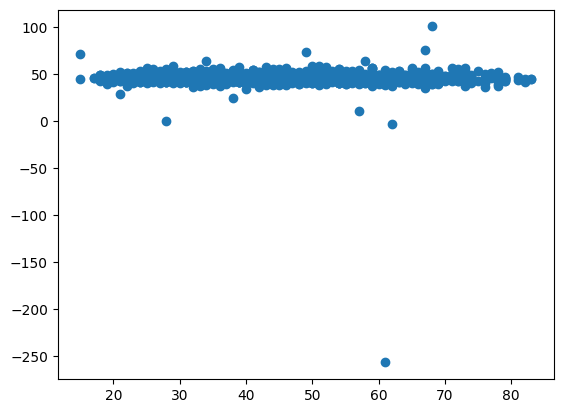

In [ ]:
display(plt.scatter(true_age, predictions_age_list))

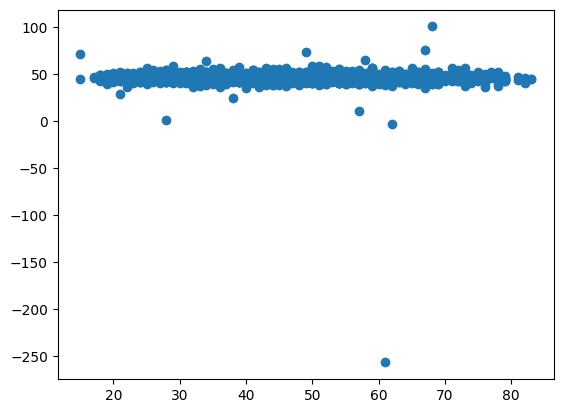

In [ ]:
display(plt.scatter(true_age, predictions_age_int))

In [ ]:
from scipy.stats import pearsonr
rsq, p = pearsonr(true_age, predictions_age_list)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(true_age, predictions_age_list)
print(rsq, p)

-0.027701062747392577 0.16165859651032166
-0.03380160878532437 0.08765720781408542


In [ ]:
from scipy.stats import pearsonr
rsq, p = pearsonr(true_age, predictions_age_int)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(true_age, predictions_age_int)
print(rsq, p)

-0.026832714444028988 0.17521749140426854
-0.03221450036289901 0.10359840885510758


In [ ]:
from sklearn import metrics
# MAE
print(metrics.mean_absolute_error(true_age, predictions_age_list))
# MSE
print(metrics.mean_squared_error(true_age, predictions_age_list))
# RMSE
print(np.sqrt(metrics.mean_squared_error(true_age, predictions_age_list)))

12.355823714749928
255.26199004863057
15.976920543353483


In [ ]:
from sklearn import metrics
# MAE
print(metrics.mean_absolute_error(true_age, predictions_age_int))
# MSE
print(metrics.mean_squared_error(true_age, predictions_age_int))
# RMSE
print(np.sqrt(metrics.mean_squared_error(true_age, predictions_age_int)))

12.344166014095537
255.14761158966328
15.97334065215111


[10, 21, 22, 16, 1, 13, 7, 1, 6, 12, 7, 13, 25, 2, 0, 13, 12, 31, 0, 13, 11, 4, 12, 8, 0, 3, 7, 11, 22, 12, 1, 12, 19, 22, 19, 5, 22, 8, 18, 13, 29, 12, 6, 13, 15, 16, 8, 5, 17, 13, 13, 6, 12, 1, 10, 13, 3, 4, 1, 9, 2, 16, 9, 28, 10, 11, 17, 11, 4, 10, 2, 8, 2, 16, 10, 10, 4, 19, 30, 8, 21, 5, 0, 9, 9, 11, 12, 4, 15, 15, 17, 11, 14, 17, 6, 23, 11, 14, 0, 9, 0, 3, 3, 19, 18, 2, 6, 13, 0, 11, 14, 3, 11, 0, 0, 15, 1, 4, 5, 21, 5, 20, 8, 18, 12, 0, 3, 14, 2, 10, 14, 10, 17, 9, 15, 15, 22, 6, 13, 9, 9, 19, 31, 21, 11, 9, 11, 11, 21, 15, 5, 20, 19, 12, 18, 15, 18, 12, 8, 7, 21, 24, 9, 5, 12, 5, 23, 16, 11, 13, 0, 3, 3, 6, 5, 17, 20, 10, 10, 0, 9, 9, 12, 4, 10, 23, 6, 2, 8, 2, 11, 3, 6, 17, 8, 17, 8, 23, 24, 18, 6, 19, 7, 13, 0, 3, 12, 14, 18, 8, 13, 3, 23, 6, 13, 19, 20, 2, 19, 15, 8, 2, 19, 5, 15, 5, 16, 12, 0, 2, 3, 9, 5, 19, 5, 4, 6, 2, 317, 31, 1, 8, 28, 3, 9, 13, 19, 1, 2, 25, 18, 8, 4, 1, 11, 15, 26, 36, 8, 13, 14, 3, 17, 4, 15, 1, 7, 13, 2, 5, 3, 16, 5, 5, 8, 8, 19, 23, 26, 9, 17, 2, 

0.08685892418008043 1.1038580548203447e-05
0.01190114750771816 0.5477224234587372


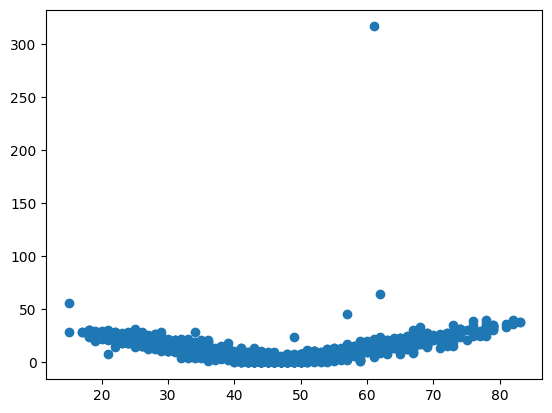

In [ ]:
age_gap = []
l = len(list(predictions_age))
for i in range(l):
  age_gap.append(int(abs(predictions_age[i] - list(y_test_age['age'])[i])))
print(age_gap)

display(plt.scatter(y_test_age, age_gap))

from scipy.stats import pearsonr
rsq, p = pearsonr(list(y_test_age['age']), age_gap)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(list(y_test_age['age']), age_gap)
print(rsq, p)

In [ ]:
import pickle
from google.colab import files

with open("BasicDNNAge.pkl", "wb") as f:
    pickle.dump(model_age, f)
    files.download("BasicDNNAge.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DenseNet Age

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
model_age = build_and_compile_model(normalizer)
model_age.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 62)               125       
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 64)                4032      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,382
Trainable params: 8,257
Non-trainable params: 125
_________________________________________________________________


In [ ]:
history = model_age.fit(
    X_train,
    y_train_age,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
256/256 [==============================] - 2s 4ms/step - loss: 21.3247 - val_loss: 13.9962
Epoch 2/100
256/256 [==============================] - 1s 5ms/step - loss: 13.4754 - val_loss: 13.3547
Epoch 3/100
256/256 [==============================] - 1s 5ms/step - loss: 12.9247 - val_loss: 13.4187
Epoch 4/100
256/256 [==============================] - 2s 6ms/step - loss: 12.6584 - val_loss: 13.0097
Epoch 5/100
256/256 [==============================] - 2s 6ms/step - loss: 12.4279 - val_loss: 13.0019
Epoch 6/100
256/256 [==============================] - 1s 4ms/step - loss: 12.2885 - val_loss: 12.8567
Epoch 7/100
256/256 [==============================] - 1s 4ms/step - loss: 12.1598 - val_loss: 12.6477
Epoch 8/100
256/256 [==============================] - 1s 4ms/step - loss: 12.0168 - val_loss: 12.5690
Epoch 9/100
256/256 [==============================] - 1s 3ms/step - loss: 11.9377 - val_loss: 12.5710
Epoch 10/100
256/256 [==============================] - 1s 3ms/step - los

In [ ]:
test_results['dnn_model'] = model_age.evaluate(X_test, y_test_age)

80/80 [==============================] - 0s 2ms/step - loss: 13.1553


In [ ]:
predictions_age = model_age.predict(X_test)
predictions_age_list = []
predictions_age_int = []
for i in predictions_age:
  predictions_age_list.append(i[0])
  predictions_age_int.append(round(i[0]))
print(list(predictions_age_list))
print(list(predictions_age_int))
print(list(true_age))

80/80 [==============================] - 0s 2ms/step
[45.96299, 48.438686, 54.40157, 56.74632, 46.97348, 47.070393, 41.6018, 33.19967, 41.898113, 53.836468, 33.285194, 34.38369, 40.75339, 35.29936, 58.4079, 40.42948, 49.494495, 42.722294, 48.66622, 62.56641, 39.59215, 42.25809, 46.982304, 65.555756, 43.847164, 40.977318, 51.445988, 39.408337, 35.629936, 54.854168, 47.00591, 35.70538, 42.248608, 42.24788, 34.35979, 33.093246, 42.29534, 43.682087, 55.448463, 27.905369, 46.456776, 39.585514, 37.068695, 53.261547, 37.720715, 52.941715, 44.826176, 46.624283, 53.431263, 45.049816, 46.825363, 38.626934, 48.15221, 28.554949, 39.502476, 39.684456, 47.165283, 53.465843, 68.79062, 40.950584, 47.267696, 42.122524, 60.40805, 35.040413, 28.84733, 55.296295, 51.051014, 44.88721, 27.963387, 44.45418, 49.24824, 50.67786, 64.93057, 29.343508, 44.628834, 56.182842, 47.091633, 48.73939, 41.061634, 43.890194, 45.97067, 50.782146, 48.780247, 43.50447, 59.66924, 57.769943, 52.665627, 43.53484, 47.845093, 51.

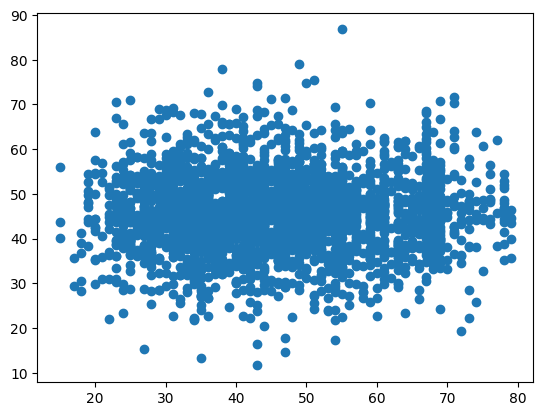

In [ ]:
display(plt.scatter(true_age, predictions_age_list))

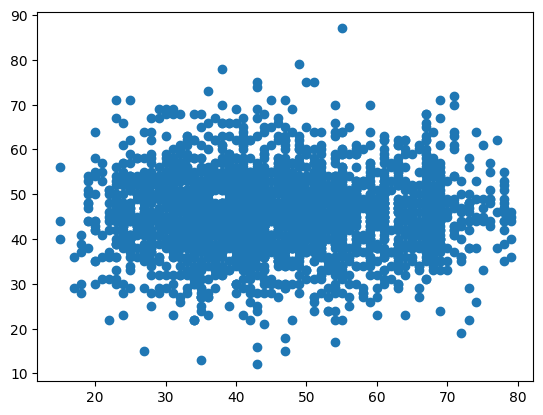

In [ ]:
display(plt.scatter(true_age, predictions_age_int))

In [ ]:
from scipy.stats import pearsonr
rsq, p = pearsonr(true_age, predictions_age_list)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(true_age, predictions_age_list)
print(rsq, p)

0.015536465389671537 0.43255258266602803
0.012607682725596103 0.5242099744987501


In [ ]:
from scipy.stats import pearsonr
rsq, p = pearsonr(true_age, predictions_age_int)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(true_age, predictions_age_int)
print(rsq, p)

0.014920156294227846 0.45103269593852463
0.011816807521594093 0.5505635613812849


In [ ]:
from sklearn import metrics
# MAE
print(metrics.mean_absolute_error(true_age, predictions_age_list))
# MSE
print(metrics.mean_squared_error(true_age, predictions_age_list))
# RMSE
print(np.sqrt(metrics.mean_squared_error(true_age, predictions_age_list)))

13.155314511961553
262.2117593539942
16.19295400333102


In [ ]:
from sklearn import metrics
# MAE
print(metrics.mean_absolute_error(true_age, predictions_age_int))
# MSE
print(metrics.mean_squared_error(true_age, predictions_age_int))
# RMSE
print(np.sqrt(metrics.mean_squared_error(true_age, predictions_age_int)))

13.160924040720438
262.51018010963196
16.202165907977612


[9, 6, 7, 9, 13, 15, 0, 34, 15, 24, 36, 19, 2, 20, 18, 6, 1, 4, 11, 16, 10, 0, 2, 41, 2, 13, 13, 11, 27, 16, 25, 23, 20, 12, 31, 10, 3, 2, 0, 12, 0, 5, 14, 9, 22, 18, 22, 9, 1, 8, 0, 7, 3, 12, 4, 7, 20, 21, 25, 0, 11, 30, 28, 4, 31, 4, 14, 16, 5, 31, 19, 31, 2, 24, 6, 16, 1, 17, 13, 10, 0, 4, 2, 4, 28, 11, 15, 35, 10, 22, 25, 9, 19, 3, 1, 19, 3, 12, 2, 7, 23, 18, 31, 4, 18, 17, 18, 18, 10, 2, 4, 13, 8, 0, 1, 11, 4, 16, 30, 7, 18, 2, 6, 14, 12, 22, 19, 8, 0, 9, 7, 3, 3, 27, 8, 13, 31, 35, 20, 10, 7, 13, 2, 13, 3, 4, 32, 1, 6, 33, 5, 29, 8, 11, 24, 8, 6, 7, 16, 5, 25, 28, 4, 12, 17, 28, 27, 13, 6, 6, 15, 30, 10, 3, 4, 10, 4, 16, 3, 28, 14, 7, 4, 21, 10, 32, 6, 7, 24, 13, 6, 7, 9, 32, 5, 14, 0, 3, 25, 14, 3, 7, 2, 3, 26, 3, 3, 2, 3, 24, 39, 7, 26, 6, 18, 6, 7, 7, 4, 26, 5, 17, 3, 14, 4, 0, 36, 13, 14, 15, 8, 9, 20, 12, 1, 21, 27, 4, 4, 6, 8, 28, 28, 10, 4, 11, 3, 12, 30, 32, 21, 0, 35, 26, 12, 1, 28, 8, 1, 2, 19, 25, 20, 21, 5, 5, 31, 15, 23, 13, 6, 5, 28, 16, 8, 8, 3, 16, 0, 1, 1, 13, 3,

0.10092829964163127 3.201464058757585e-07
0.042683151263432445 0.031004858456591504


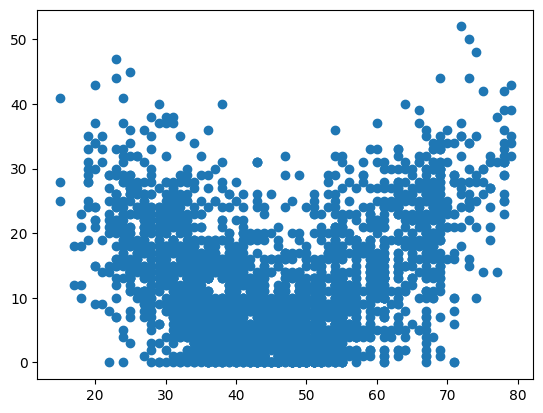

In [ ]:
age_gap = []
l = len(list(predictions_age))
for i in range(l):
  age_gap.append(int(abs(predictions_age[i] - list(y_test_age['age'])[i])))
print(age_gap)

display(plt.scatter(y_test_age, age_gap))

from scipy.stats import pearsonr
rsq, p = pearsonr(true_age, age_gap)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(true_age, age_gap)
print(rsq, p)

In [ ]:
import pickle
from google.colab import files

with open("DenseNetAge.pkl", "wb") as f:
    pickle.dump(model_age, f)
    files.download("DenseNetAge.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ResNet Model for Age

In [ ]:
print(type(y_train_age))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# rerun initial cells where X_train, X_test defined

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import tensorflow as tf
n_samples, n_features = X_train.shape
inp_size = n_features
out_size = 1
model_age = nn.Linear(inp_size, out_size)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model_age.parameters(), lr=0.001)
epochs = 5000
#X_train = torch.from_numpy(X_train.to_numpy().astype('float32'))
#X_train = torch.from_numpy(X_train.astype('float32'))
y_temp = torch.from_numpy(y_train_age.to_numpy().astype('float32'))
for epoch in range(epochs):
  predicted_age = model_age(X_train)
  loss = criterion(predicted_age, y_temp)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  if (epoch+1)%10 == 0:
    print(epoch+1, loss.item())

10 2235.2841796875
20 2155.17138671875
30 2078.22119140625
40 2004.3057861328125
50 1933.3031005859375
60 1865.096923828125
70 1799.575927734375
80 1736.6329345703125
90 1676.1663818359375
100 1618.07763671875
110 1562.2728271484375
120 1508.661865234375
130 1457.15771484375
140 1407.6776123046875
150 1360.1414794921875
160 1314.4730224609375
170 1270.5985107421875
180 1228.4476318359375
190 1187.9521484375
200 1149.0472412109375
210 1111.6700439453125
220 1075.7606201171875
230 1041.261474609375
240 1008.116943359375
250 976.2739868164062
260 945.6810913085938
270 916.28955078125
280 888.0517578125
290 860.9227905273438
300 834.8587646484375
310 809.8179321289062
320 785.7601928710938
330 762.6468505859375
340 740.4406127929688
350 719.106201171875
360 698.6093139648438
370 678.9169311523438
380 659.9974365234375
390 641.8204956054688
400 624.3571166992188
410 607.5791625976562
420 591.4595336914062
430 575.9725952148438
440 561.0934448242188
450 546.7982788085938
460 533.064025878906

In [ ]:
#X_test = torch.from_numpy(X_test.astype('float32'))
predicted_age = model_age(X_test).tolist()
predicted_age_list = []
predicted_age_int = []
for i in predicted_age:
  if i[0] > 0:
    predicted_age_list.append(i[0])
    predicted_age_int.append(round(i[0]))
  else:
    predicted_age_list.append(50)
    predicted_age_int.append(50)
print(predicted_age_list)
print(predicted_age_int)
print(true_age)

[46.04330062866211, 46.065528869628906, 46.53510665893555, 46.24472427368164, 46.69589614868164, 44.6794319152832, 46.022926330566406, 48.388980865478516, 46.42617416381836, 45.90304946899414, 45.24796676635742, 53.458740234375, 45.88206481933594, 46.64519119262695, 45.05787658691406, 45.56785583496094, 45.56767654418945, 49.56624221801758, 46.50238037109375, 45.896629333496094, 45.337825775146484, 46.72727966308594, 45.20810317993164, 45.0516242980957, 45.80361557006836, 46.41626739501953, 46.026947021484375, 48.332359313964844, 46.47449493408203, 48.01665496826172, 45.23912048339844, 46.301876068115234, 46.09248352050781, 45.57980728149414, 43.7021598815918, 46.855716705322266, 45.8126106262207, 47.41691970825195, 44.3015251159668, 47.96220016479492, 44.900821685791016, 46.185665130615234, 45.63808059692383, 45.81774139404297, 45.531883239746094, 44.95342254638672, 47.30308151245117, 45.758731842041016, 46.66098403930664, 46.108707427978516, 45.268375396728516, 46.524566650390625, 46

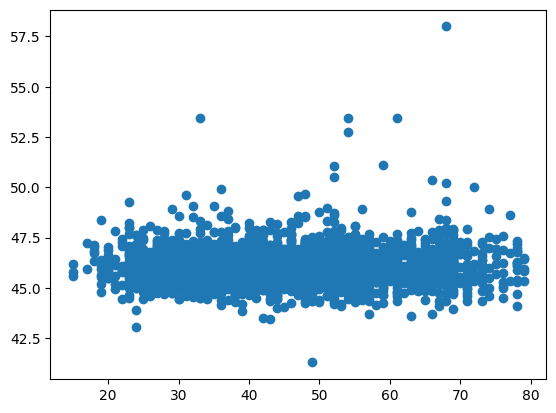

In [ ]:
display(plt.scatter(true_age, predicted_age_list))

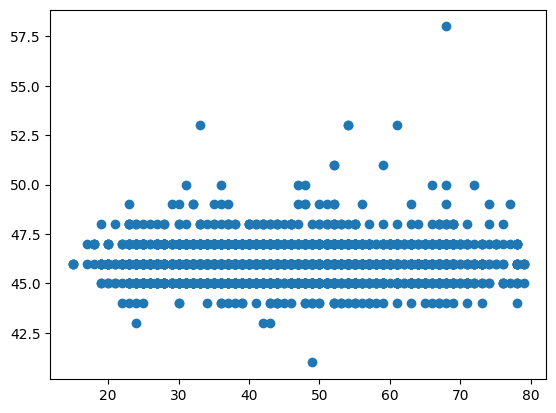

In [ ]:
display(plt.scatter(true_age, predicted_age_int))

In [ ]:
from scipy.stats import pearsonr
rsq, p = pearsonr(true_age, predicted_age_list)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(true_age, predictions_age_list)
print(rsq, p)


0.019498516271147973 0.32461915576409645
0.012607682725596103 0.5242099744987501


In [ ]:
from scipy.stats import pearsonr
rsq, p = pearsonr(true_age, predicted_age_int)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(true_age, predictions_age_int)
print(rsq, p)


0.020333436311711275 0.30432801472229204
0.011816807521594093 0.5505635613812849


In [ ]:
from sklearn import metrics
# MAE
print(metrics.mean_absolute_error(true_age, predicted_age_list))
# MSE
print(metrics.mean_squared_error(true_age, predicted_age_list))
# RMSE
print(np.sqrt(metrics.mean_squared_error(true_age, predicted_age_list)))

11.407246048224561
187.51311631253265
13.693542869269905


In [ ]:
from sklearn import metrics
# MAE
print(metrics.mean_absolute_error(true_age, predicted_age_int))
# MSE
print(metrics.mean_squared_error(true_age, predicted_age_int))
# RMSE
print(np.sqrt(metrics.mean_squared_error(true_age, predicted_age_int)))

11.406812842599843
187.55873140172278
13.695208337288001


[8, 0, 19, 6, 14, 24, 10, 5, 3, 17, 8, 16, 1, 8, 10, 13, 8, 18, 17, 10, 23, 9, 13, 15, 2, 0, 9, 0, 6, 5, 2, 27, 16, 0, 5, 0, 25, 21, 24, 0, 8, 2, 14, 9, 5, 1, 14, 2, 7, 5, 2, 22, 21, 2, 10, 17, 22, 1, 10, 19, 4, 20, 18, 8, 2, 5, 8, 1, 24, 13, 10, 22, 3, 21, 12, 12, 7, 19, 1, 18, 5, 10, 4, 22, 6, 19, 16, 7, 23, 2, 10, 13, 14, 3, 0, 8, 14, 22, 3, 16, 15, 9, 2, 22, 8, 22, 9, 13, 3, 28, 19, 8, 1, 5, 10, 12, 14, 19, 8, 10, 20, 13, 12, 10, 25, 32, 11, 7, 21, 24, 13, 9, 3, 28, 18, 5, 6, 10, 2, 16, 18, 32, 4, 6, 4, 22, 6, 18, 23, 18, 7, 23, 0, 14, 13, 4, 9, 0, 10, 2, 4, 15, 2, 20, 7, 22, 19, 23, 1, 18, 12, 12, 3, 5, 7, 14, 25, 7, 8, 16, 2, 7, 8, 4, 5, 12, 12, 12, 19, 13, 0, 12, 7, 7, 20, 16, 2, 20, 10, 7, 11, 3, 16, 19, 14, 10, 5, 4, 14, 20, 8, 7, 15, 12, 21, 22, 16, 14, 2, 18, 16, 9, 1, 13, 6, 6, 2, 15, 8, 10, 14, 13, 15, 10, 16, 8, 27, 14, 10, 7, 4, 27, 15, 13, 2, 8, 3, 0, 0, 10, 10, 3, 9, 20, 18, 6, 12, 30, 5, 20, 16, 1, 28, 5, 3, 16, 11, 0, 13, 10, 0, 11, 10, 16, 16, 20, 6, 3, 4, 14, 8, 9,

-0.0016911543177010819 0.9319240890683067
0.00440682353024012 0.8238466773534335


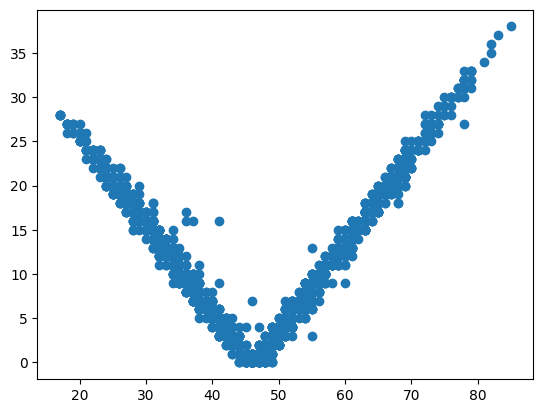

In [ ]:
age_gap = []
l = len(list(predictions_age))
for i in range(l):
  age_gap.append(int(abs(predicted_age_list[i] - list(y_test_age['age'])[i])))
print(age_gap)

display(plt.scatter(y_test_age, age_gap))

from scipy.stats import pearsonr
rsq, p = pearsonr(true_age, age_gap)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(true_age, age_gap)
print(rsq, p)

In [ ]:
import pickle
from google.colab import files

with open("ResnetAge.pkl", "wb") as f:
    pickle.dump(model_age, f)
    files.download("ResnetAge.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Diferent Models

In [ ]:
df_tot = df_tot.dropna()
X = df_tot[['F0semitoneFrom27.5Hz_sma3nz_amean',
       'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
       'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
       'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean',
       'loudness_sma3_stddevNorm', 'loudness_sma3_percentile20.0',
       'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0',
       'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanRisingSlope',
       'loudness_sma3_stddevRisingSlope', 'loudness_sma3_meanFallingSlope',
       'loudness_sma3_stddevFallingSlope', 'spectralFlux_sma3_amean',
       'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_amean',
       'mfcc1_sma3_stddevNorm', 'mfcc2_sma3_amean', 'mfcc2_sma3_stddevNorm',
       'mfcc3_sma3_amean', 'mfcc3_sma3_stddevNorm', 'mfcc4_sma3_amean',
       'mfcc4_sma3_stddevNorm', 'jitterLocal_sma3nz_amean',
       'jitterLocal_sma3nz_stddevNorm', 'shimmerLocaldB_sma3nz_amean',
       'shimmerLocaldB_sma3nz_stddevNorm', 'HNRdBACF_sma3nz_amean',
       'HNRdBACF_sma3nz_stddevNorm', 'logRelF0-H1-H2_sma3nz_amean',
       'logRelF0-H1-H2_sma3nz_stddevNorm', 'logRelF0-H1-A3_sma3nz_amean',
       'logRelF0-H1-A3_sma3nz_stddevNorm', 'F1frequency_sma3nz_amean',
       'F1frequency_sma3nz_stddevNorm', 'F1bandwidth_sma3nz_amean',
       'F1bandwidth_sma3nz_stddevNorm', 'F1amplitudeLogRelF0_sma3nz_amean',
       'F1amplitudeLogRelF0_sma3nz_stddevNorm', 'F2frequency_sma3nz_amean',
       'F2frequency_sma3nz_stddevNorm', 'F2bandwidth_sma3nz_amean',
       'F2bandwidth_sma3nz_stddevNorm', 'F2amplitudeLogRelF0_sma3nz_amean',
       'F2amplitudeLogRelF0_sma3nz_stddevNorm', 'F3frequency_sma3nz_amean',
       'F3frequency_sma3nz_stddevNorm', 'F3bandwidth_sma3nz_amean',
       'F3bandwidth_sma3nz_stddevNorm', 'F3amplitudeLogRelF0_sma3nz_amean',
       'F3amplitudeLogRelF0_sma3nz_stddevNorm', 'alphaRatioV_sma3nz_amean',
       'alphaRatioV_sma3nz_stddevNorm', 'hammarbergIndexV_sma3nz_amean',
       'hammarbergIndexV_sma3nz_stddevNorm', 'slopeV0-500_sma3nz_amean',
       'slopeV0-500_sma3nz_stddevNorm', 'slopeV500-1500_sma3nz_amean',
       'slopeV500-1500_sma3nz_stddevNorm', 'spectralFluxV_sma3nz_amean',
       'spectralFluxV_sma3nz_stddevNorm', 'mfcc1V_sma3nz_amean',
       'mfcc1V_sma3nz_stddevNorm', 'mfcc2V_sma3nz_amean',
       'mfcc2V_sma3nz_stddevNorm', 'mfcc3V_sma3nz_amean',
       'mfcc3V_sma3nz_stddevNorm', 'mfcc4V_sma3nz_amean',
       'mfcc4V_sma3nz_stddevNorm', 'alphaRatioUV_sma3nz_amean',
       'hammarbergIndexUV_sma3nz_amean', 'slopeUV0-500_sma3nz_amean',
       'slopeUV500-1500_sma3nz_amean', 'spectralFluxUV_sma3nz_amean',
       'loudnessPeaksPerSec', 'VoicedSegmentsPerSec',
       'MeanVoicedSegmentLengthSec', 'StddevVoicedSegmentLengthSec',
       'MeanUnvoicedSegmentLength', 'StddevUnvoicedSegmentLength',
       'equivalentSoundLevel_dBp']]
y_age = df_tot[['age']]
y_gender = df_tot[['gender']]

import warnings
warnings.filterwarnings("ignore")

cv = 8

X_train, X_test, y_train_age, y_test_age = train_test_split(X, y_age, random_state = 0 , train_size=0.8)
X_train, X_test, y_train_gender, y_test_gender = train_test_split(X, y_gender, random_state = 0 , train_size=0.8)


X = X_train
# X stays constant, but y will have 3 different ones
# y = y_train

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Random Forrest age
y = y_train_age
clf = RandomForestClassifier(random_state = 0 , n_estimators=100)
model = clf.fit(X_scaled, y.values.ravel())#y)

scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), verbose=100)

print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))

[CV] START .....................................................................
[CV] END ................................ score: (test=0.530) total time=  23.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   23.8s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.529) total time=  22.9s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:   46.7s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.526) total time=  22.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  1.1min
[CV] START .....................................................................
[CV] END ................................ score: (test=0.541) total time=  22.1s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:  1.5min
[CV] START .....................................................................
[CV] END ..................

In [ ]:
predicted_age = model.predict(X_test_scaled)
print(list(predicted_age))
print(list(y_test_age['age']))

[31.0, 40.0, 67.0, 25.0, 55.0, 45.0, 69.0, 50.0, 46.0, 33.0, 41.0, 54.0, 61.0, 46.0, 43.0, 69.0, 48.0, 39.0, 67.0, 31.0, 31.0, 57.0, 36.0, 59.0, 54.0, 48.0, 40.0, 50.0, 27.0, 72.0, 42.0, 57.0, 46.0, 33.0, 42.0, 36.0, 33.0, 28.0, 38.0, 38.0, 53.0, 68.0, 59.0, 61.0, 39.0, 55.0, 54.0, 40.0, 44.0, 30.0, 26.0, 61.0, 52.0, 55.0, 55.0, 30.0, 23.0, 37.0, 41.0, 59.0, 38.0, 48.0, 54.0, 59.0, 23.0, 31.0, 36.0, 69.0, 74.0, 63.0, 51.0, 50.0, 39.0, 44.0, 68.0, 46.0, 36.0, 36.0, 50.0, 28.0, 38.0, 32.0, 61.0, 31.0, 32.0, 63.0, 43.0, 29.0, 28.0, 31.0, 18.0, 52.0, 28.0, 65.0, 23.0, 31.0, 32.0, 65.0, 68.0, 31.0, 47.0, 44.0, 56.0, 68.0, 50.0, 67.0, 29.0, 32.0, 33.0, 24.0, 69.0, 32.0, 43.0, 23.0, 38.0, 36.0, 50.0, 36.0, 24.0, 50.0, 55.0, 46.0, 42.0, 31.0, 48.0, 24.0, 34.0, 44.0, 47.0, 63.0, 47.0, 43.0, 72.0, 32.0, 31.0, 61.0, 44.0, 57.0, 34.0, 63.0, 25.0, 46.0, 38.0, 41.0, 47.0, 43.0, 63.0, 54.0, 50.0, 40.0, 28.0, 61.0, 51.0, 43.0, 51.0, 31.0, 53.0, 35.0, 30.0, 61.0, 41.0, 28.0, 37.0, 52.0, 51.0, 36.0, 63.

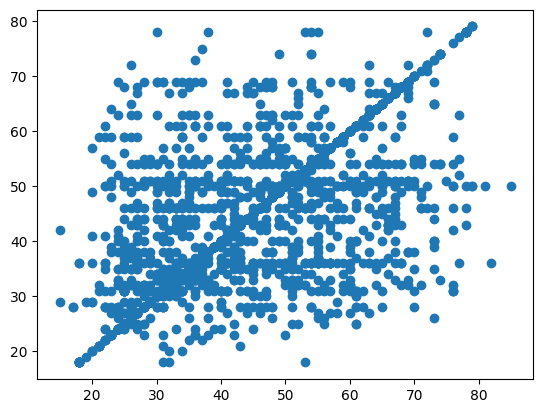

In [ ]:
display(plt.scatter(list(y_test_age['age']), predicted_age))

In [ ]:
from scipy.stats import pearsonr
rsq, p = pearsonr(list(y_test_age['age']), predicted_age)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(list(y_test_age['age']), predicted_age)
print(rsq, p)

0.6558829677216074 5.0152977203e-314
0.6564441724618368 9.620906695e-315


In [ ]:
from sklearn import metrics
# MAE
print(metrics.mean_absolute_error(list(y_test_age['age']), predicted_age))
# MSE
print(metrics.mean_squared_error(list(y_test_age['age']), predicted_age))
# RMSE
print(np.sqrt(metrics.mean_squared_error(list(y_test_age['age']), predicted_age)))

6.01840250587314
127.32537196554425
11.283854481760399


[14, 12, 12, 4, 8, 2, 27, 17, 3, 16, 13, 39, 12, 34, 30, 0, 2, 3, 18, 31, 10, 11, 10, 6, 10, 30, 11, 10, 10, 17, 3, 21, 11, 4, 11, 2, 7, 15, 17, 10, 6, 28, 4, 1, 1, 2, 9, 20, 2, 5, 20, 22, 7, 26, 6, 10, 24, 16, 27, 18, 9, 1, 6, 31, 11, 24, 24, 14, 21, 18, 16, 0, 8, 14, 9, 23, 17, 13, 8, 12, 17, 18, 2, 7, 27, 7, 4, 14, 4, 26, 34, 7, 23, 18, 6, 19, 15, 31, 22, 21, 11, 21, 9, 17, 5, 27, 2, 9, 6, 26, 6, 14, 20, 27, 5, 30, 1, 16, 26, 18, 7, 2, 1, 13, 10, 18, 3, 9, 9, 12, 3, 12, 14, 3, 12, 7, 24, 4, 15, 3, 0, 19, 0, 20, 0, 34, 48, 26, 1, 20, 15, 0, 2, 12, 16, 20, 19, 16, 21, 19, 25, 6, 9, 0, 11, 3, 18, 31, 5, 3, 5, 19, 3, 23, 9, 14, 11, 4, 4, 14, 7, 2, 18, 0, 9, 23, 10, 8, 20, 17, 3, 3, 9, 10, 10, 32, 19, 3, 5, 9, 13, 8, 4, 15, 15, 3, 4, 6, 4, 11, 30, 12, 7, 22, 18, 24, 11, 8, 40, 26, 24, 14, 18, 0, 10, 1, 41, 12, 13, 4, 26, 12, 11, 8, 1, 45, 6, 17, 6, 7, 0, 12, 13, 8, 7, 14, 9, 13, 25, 36, 17, 11, 43, 26, 2, 1, 26, 8, 4, 0, 4, 3, 11, 3, 4, 21, 0, 1, 15, 6, 9, 10, 21, 1, 1, 15, 4, 25, 0, 8, 

0.08869294958697654 7.157839523568286e-06
0.031143661197361897 0.1155980050560439


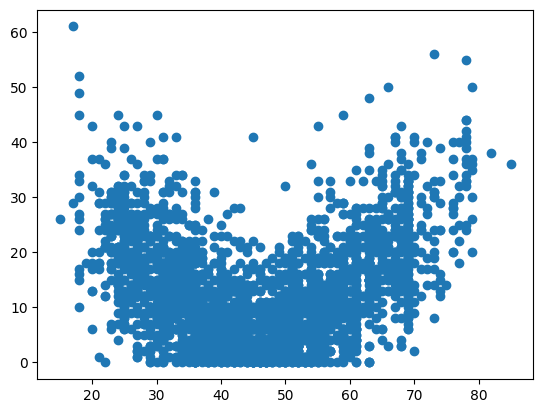

In [ ]:
age_gap = []
l = len(list(predictions_age))
for i in range(l):
  age_gap.append(int(abs(predictions_age[i] - list(y_test_age['age'])[i])))
print(age_gap)

display(plt.scatter(y_test_age, age_gap))

from scipy.stats import pearsonr
rsq, p = pearsonr(list(y_test_age['age']), age_gap)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(list(y_test_age['age']), age_gap)
print(rsq, p)

In [ ]:
import pickle
from google.colab import files

with open("RandomForrestAge.pkl", "wb") as f:
    pickle.dump(model, f)
    files.download("RandomForrestAge.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Random Forrest Gender
y = y_train_gender
clf = RandomForestClassifier(random_state = 0 , n_estimators=100)
model = clf.fit(X_scaled, y.values.ravel())#y)

scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), verbose=100)

print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))

[CV] START .....................................................................
[CV] END ................................ score: (test=0.916) total time=   6.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.931) total time=   6.2s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:   12.7s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.929) total time=   5.6s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:   18.3s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.922) total time=   7.1s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:   25.4s
[CV] START .....................................................................
[CV] END ..................

In [ ]:
predicted_gender = model.predict(X_test_scaled)
print(list(predicted_gender))
print(list(y_test_gender['gender']))
confusion_matrix = [[0, 0], [0, 0]]
l = len(predicted_gender)
for i in range(l):
  if list(predicted_gender)[i] == 'm' and list(y_test_gender['gender'])[i] == 'm':
    confusion_matrix[0][0] += 1
  elif list(predicted_gender)[i] == 'f' and list(y_test_gender['gender'])[i] == 'f':
    confusion_matrix[1][1] += 1
  elif list(predicted_gender)[i] == 'm' and list(y_test_gender['gender'])[i] == 'f':
    confusion_matrix[0][1] += 1
  else:
    confusion_matrix[1][0] += 1
print(confusion_matrix[0])
print(confusion_matrix[1])

['m', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'm', 'f', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'f', 'f', 'm', 'm', 'm', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'f', 'm', 'f', 'f', 'f', 'm', 'm', 'f', 'm', 'm', 'm', 'm', 'f', 'm', 'f', 'm', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'f', 'm', 'f', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'f', 'f', 'm', 'f', 'm', 'f', 'm', 'm', 'm', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'f', 'm', 'f', 'f', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'f', 'm', 'm', 'm', 'm', 'f', 'm', 'f', 'f', 'f', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'f', 'f', 'm', 'f', 'm', 'f', 'm', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'f', 'm', 'm',

In [ ]:
import pickle
from google.colab import files

with open("RandomForrestGender.pkl", "wb") as f:
    pickle.dump(model, f)
    files.download("RandomForrestGender.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Logistic Regression age
y = y_train_age
clf = LogisticRegression(solver='liblinear' , random_state = 0)#RandomForestClassifier(max_features = 20, random_state = 0 , n_estimators=800 )
model = clf.fit(X_scaled, y.values.ravel())#y)


scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), verbose=100)


print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))


[CV] START .....................................................................
[CV] END ................................ score: (test=0.166) total time= 1.2min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.2min
[CV] START .....................................................................
[CV] END ................................ score: (test=0.165) total time=  38.1s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  1.8min
[CV] START .....................................................................
[CV] END ................................ score: (test=0.158) total time=  40.3s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  2.5min
[CV] START .....................................................................
[CV] END ................................ score: (test=0.163) total time=  38.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:  3.1min
[CV] START .....................................................................
[CV] END ..................

In [ ]:
predicted_age = model.predict(X_test_scaled)
print(list(predicted_age))
print(list(y_test_age['age']))

[31, 36, 54, 33, 34, 47, 44, 61, 59, 50, 29, 63, 47, 33, 28, 41, 51, 55, 41, 31, 43, 69, 36, 67, 50, 24, 38, 67, 20, 72, 54, 55, 36, 59, 32, 36, 63, 41, 40, 52, 37, 63, 32, 53, 46, 55, 54, 40, 32, 47, 32, 61, 31, 41, 55, 25, 57, 32, 50, 59, 64, 32, 54, 55, 39, 40, 46, 52, 74, 47, 49, 50, 46, 44, 49, 46, 52, 44, 22, 57, 49, 59, 63, 31, 32, 61, 49, 51, 38, 48, 18, 47, 33, 73, 23, 36, 40, 59, 57, 59, 31, 52, 44, 68, 63, 31, 51, 32, 25, 24, 51, 34, 47, 28, 38, 47, 50, 70, 25, 42, 34, 57, 46, 31, 48, 24, 47, 36, 57, 78, 54, 29, 59, 32, 31, 36, 48, 50, 61, 67, 48, 35, 38, 59, 47, 67, 63, 29, 50, 52, 41, 27, 51, 57, 50, 31, 49, 44, 31, 51, 25, 51, 51, 51, 32, 38, 54, 33, 69, 35, 38, 54, 54, 50, 44, 68, 52, 59, 43, 35, 61, 34, 66, 40, 36, 54, 78, 31, 68, 55, 31, 28, 38, 59, 36, 20, 54, 52, 38, 63, 57, 54, 52, 52, 37, 36, 49, 49, 33, 46, 51, 52, 22, 38, 38, 74, 65, 46, 28, 63, 47, 36, 50, 52, 52, 50, 33, 61, 40, 68, 63, 43, 56, 68, 51, 59, 57, 52, 38, 31, 63, 58, 51, 28, 36, 25, 38, 36, 64, 27,

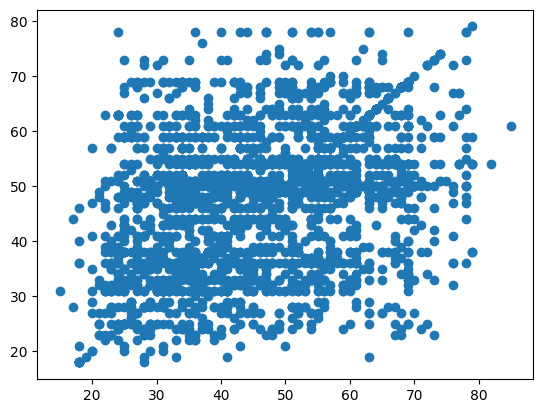

In [ ]:
display(plt.scatter(list(y_test_age['age']), predicted_age))

In [ ]:
from scipy.stats import pearsonr
rsq, p = pearsonr(list(y_test_age['age']), predicted_age)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(list(y_test_age['age']), predicted_age)
print(rsq, p)

0.3501543486910926 1.4725481879356819e-74
0.3452662093429587 2.0748637738110276e-72


In [ ]:
from sklearn import metrics
# MAE
print(metrics.mean_absolute_error(list(y_test_age['age']), predicted_age))
# MSE
print(metrics.mean_squared_error(list(y_test_age['age']), predicted_age))
# RMSE
print(np.sqrt(metrics.mean_squared_error(list(y_test_age['age']), predicted_age)))

11.339467501957714
236.25176194205167
15.370483464811759


[0, 0, 13, 28, 21, 2, 25, 10, 21, 13, 9, 11, 19, 37, 0, 0, 1, 16, 26, 0, 14, 38, 21, 8, 4, 47, 2, 17, 5, 0, 3, 2, 5, 21, 14, 0, 28, 13, 2, 14, 16, 5, 10, 2, 7, 0, 0, 27, 19, 4, 6, 0, 10, 14, 9, 4, 34, 5, 9, 0, 26, 9, 0, 12, 1, 9, 19, 22, 25, 16, 17, 0, 27, 0, 5, 13, 13, 9, 11, 26, 14, 27, 12, 5, 0, 11, 8, 7, 5, 23, 0, 5, 7, 8, 13, 18, 8, 14, 11, 31, 16, 14, 1, 41, 11, 8, 22, 28, 27, 9, 12, 10, 20, 5, 4, 21, 1, 13, 1, 7, 21, 20, 10, 3, 0, 0, 13, 2, 25, 15, 19, 14, 4, 0, 2, 10, 6, 0, 29, 4, 4, 10, 0, 1, 0, 42, 0, 3, 0, 20, 13, 9, 15, 14, 10, 0, 4, 16, 1, 10, 0, 22, 18, 1, 0, 3, 23, 40, 26, 6, 17, 3, 0, 21, 7, 0, 12, 0, 0, 12, 2, 6, 0, 13, 7, 13, 15, 1, 19, 12, 16, 11, 3, 26, 0, 0, 2, 4, 9, 21, 23, 29, 0, 24, 31, 0, 4, 16, 8, 6, 6, 1, 17, 11, 7, 0, 0, 5, 5, 0, 11, 6, 18, 1, 0, 3, 2, 1, 17, 18, 39, 11, 6, 24, 0, 0, 2, 22, 17, 0, 0, 0, 9, 24, 9, 1, 2, 14, 0, 5, 19, 18, 21, 3, 7, 14, 0, 19, 0, 18, 14, 14, 27, 7, 7, 13, 9, 20, 15, 22, 13, 17, 21, 4, 3, 9, 17, 0, 0, 0, 22, 3, 9, 14, 1, 2, 12, 

-0.00030122021707741214 0.9878603763724857
-0.030002022091966712 0.12956623876567352


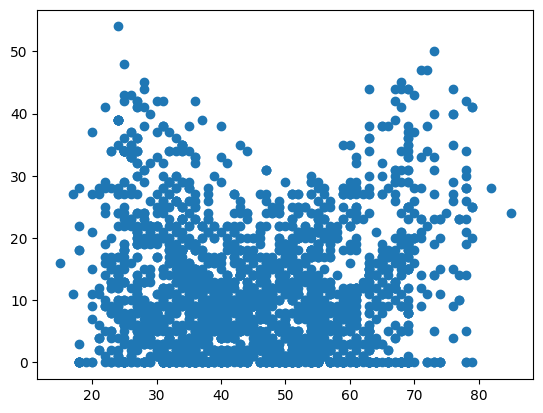

In [ ]:
age_gap = []
l = len(list(predictions_age))
for i in range(l):
  age_gap.append(abs(predicted_age[i] - list(y_test_age['age'])[i]))
print(age_gap)

display(plt.scatter(y_test_age, age_gap))

from scipy.stats import pearsonr
rsq, p = pearsonr(list(y_test_age['age']), age_gap)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(list(y_test_age['age']), age_gap)
print(rsq, p)

In [ ]:
import pickle
from google.colab import files

with open("LogisticRegressionAge.pkl", "wb") as f:
    pickle.dump(model, f)
    files.download("LogisticRegressionAge.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Logistic Regression gender
y = y_train_gender
clf = LogisticRegression(solver='liblinear' , random_state = 0)#RandomForestClassifier(max_features = 20, random_state = 0 , n_estimators=800 )
model = clf.fit(X_scaled, y.values.ravel())#y)


scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), verbose=100)


print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))

[CV] START .....................................................................
[CV] END ................................ score: (test=0.913) total time=   0.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.3s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.931) total time=   0.3s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.6s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.923) total time=   0.3s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.9s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.917) total time=   0.3s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    1.2s
[CV] START .....................................................................
[CV] END ..................

In [ ]:
predicted_gender = model.predict(X_test_scaled)
print(list(predicted_gender))
print(list(y_test_gender['gender']))
confusion_matrix = [[0, 0], [0, 0]]
l = len(predicted_gender)
for i in range(l):
  if list(predicted_gender)[i] == 'm' and list(y_test_gender['gender'])[i] == 'm':
    confusion_matrix[0][0] += 1
  elif list(predicted_gender)[i] == 'f' and list(y_test_gender['gender'])[i] == 'f':
    confusion_matrix[1][1] += 1
  elif list(predicted_gender)[i] == 'm' and list(y_test_gender['gender'])[i] == 'f':
    confusion_matrix[0][1] += 1
  else:
    confusion_matrix[1][0] += 1
print(confusion_matrix[0])
print(confusion_matrix[1])

['m', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'm', 'f', 'f', 'f', 'm', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'f', 'f', 'm', 'm', 'm', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'f', 'm', 'f', 'f', 'f', 'm', 'm', 'f', 'f', 'm', 'm', 'm', 'f', 'm', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'f', 'm', 'f', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'f', 'm', 'f', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'f', 'm', 'f', 'f', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'f', 'm', 'm', 'm', 'm', 'f', 'm', 'f', 'f', 'f', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'f', 'm', 'm', 'f', 'm', 'f', 'm', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'm',

In [ ]:
import pickle
from google.colab import files

with open("LogisticRegressionGender.pkl", "wb") as f:
    pickle.dump(model, f)
    files.download("LogisticRegressionGender.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SVM

In [ ]:
from sklearn import svm

In [ ]:
# SVM age
y = y_train_age
clf = svm.SVC(probability=True)
model = clf.fit(X_scaled, y.values.ravel())


scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), verbose = 100)


print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))

[CV] START .....................................................................
[CV] END ................................ score: (test=0.310) total time= 1.1min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.1min
[CV] START .....................................................................
[CV] END ................................ score: (test=0.290) total time= 1.1min
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  2.1min
[CV] START .....................................................................
[CV] END ................................ score: (test=0.287) total time= 1.1min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  3.2min
[CV] START .....................................................................
[CV] END ................................ score: (test=0.312) total time= 1.0min
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:  4.2min
[CV] START .....................................................................
[CV] END ..................

In [ ]:
predicted_age = model.predict(X_test_scaled)
print(list(predicted_age))
print(list(y_test_age['age']))

[31, 36, 67, 32, 32, 45, 33, 51, 54, 39, 31, 48, 47, 36, 28, 42, 52, 39, 40, 31, 31, 47, 36, 59, 54, 24, 38, 67, 32, 72, 51, 54, 35, 33, 38, 36, 34, 57, 33, 38, 37, 44, 32, 67, 39, 55, 54, 40, 46, 51, 57, 61, 31, 49, 38, 31, 57, 47, 41, 59, 61, 35, 54, 42, 40, 31, 51, 36, 48, 63, 49, 50, 40, 44, 49, 46, 34, 46, 40, 28, 54, 32, 61, 37, 32, 31, 49, 42, 47, 48, 18, 49, 35, 37, 23, 47, 40, 59, 46, 24, 51, 50, 43, 68, 65, 31, 34, 35, 37, 24, 51, 32, 48, 40, 38, 68, 50, 43, 32, 41, 49, 57, 46, 31, 48, 24, 34, 51, 50, 35, 54, 43, 54, 32, 31, 54, 24, 50, 32, 67, 46, 25, 38, 59, 47, 55, 63, 51, 50, 51, 28, 27, 51, 43, 69, 31, 62, 69, 30, 61, 25, 32, 51, 51, 32, 46, 54, 46, 43, 35, 55, 36, 54, 50, 47, 68, 40, 59, 43, 47, 63, 52, 66, 24, 38, 50, 46, 31, 49, 67, 35, 57, 38, 27, 36, 49, 54, 52, 38, 32, 44, 25, 52, 28, 48, 36, 27, 49, 48, 40, 51, 54, 41, 38, 46, 54, 33, 51, 31, 63, 25, 36, 32, 55, 52, 46, 33, 42, 43, 54, 26, 54, 54, 61, 35, 59, 57, 34, 23, 31, 63, 55, 51, 44, 36, 32, 47, 51, 64, 28,

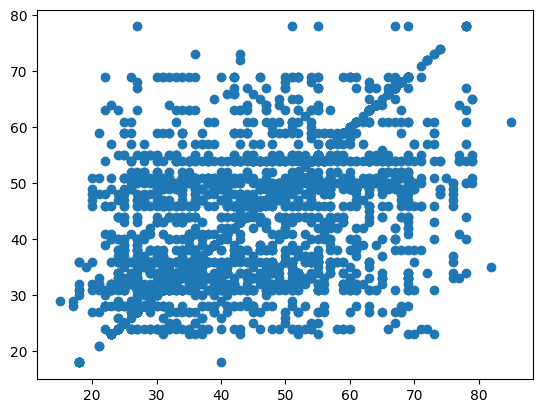

In [ ]:
display(plt.scatter(list(y_test_age['age']), predicted_age))

In [ ]:
from scipy.stats import pearsonr
rsq, p = pearsonr(list(y_test_age['age']), predicted_age)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(list(y_test_age['age']), predicted_age)
print(rsq, p)

0.49071672728506704 6.910044126929323e-155
0.48943602837436045 5.7032281255495424e-154


In [ ]:
from sklearn import metrics
# MAE
print(metrics.mean_absolute_error(list(y_test_age['age']), predicted_age))
# MSE
print(metrics.mean_squared_error(list(y_test_age['age']), predicted_age))
# RMSE
print(np.sqrt(metrics.mean_squared_error(list(y_test_age['age']), predicted_age)))

8.859827721221613
176.54346123727487
13.286965840148564


[0, 0, 0, 29, 23, 0, 36, 0, 16, 2, 11, 26, 19, 34, 0, 1, 0, 0, 27, 0, 2, 16, 21, 0, 0, 47, 2, 17, 7, 0, 0, 3, 4, 5, 8, 0, 1, 29, 5, 0, 16, 24, 10, 12, 0, 0, 0, 27, 5, 0, 31, 0, 10, 6, 8, 2, 34, 10, 0, 0, 23, 6, 0, 25, 0, 0, 24, 6, 1, 0, 17, 0, 33, 0, 5, 13, 31, 11, 7, 3, 9, 0, 10, 1, 0, 19, 8, 16, 4, 23, 0, 3, 5, 28, 13, 7, 8, 14, 22, 4, 4, 16, 0, 41, 13, 8, 5, 25, 15, 9, 12, 8, 21, 17, 4, 0, 1, 14, 8, 6, 6, 20, 10, 3, 0, 0, 0, 17, 18, 28, 19, 0, 9, 0, 2, 8, 30, 0, 0, 4, 6, 0, 0, 1, 0, 30, 0, 25, 0, 19, 0, 9, 15, 0, 9, 0, 9, 9, 0, 0, 0, 3, 18, 1, 0, 11, 23, 27, 0, 6, 0, 21, 0, 21, 10, 0, 0, 0, 0, 0, 0, 24, 0, 29, 9, 17, 17, 1, 0, 0, 12, 18, 3, 6, 0, 29, 2, 4, 9, 10, 10, 0, 0, 0, 20, 0, 18, 16, 7, 0, 6, 1, 2, 11, 15, 20, 32, 0, 8, 0, 11, 6, 0, 2, 0, 1, 2, 20, 14, 4, 2, 0, 4, 17, 16, 0, 2, 4, 32, 0, 0, 3, 9, 8, 9, 8, 7, 1, 0, 6, 0, 9, 12, 7, 0, 0, 0, 0, 9, 18, 13, 18, 13, 19, 0, 1, 0, 5, 14, 5, 6, 18, 5, 0, 3, 3, 17, 0, 0, 0, 0, 0, 9, 14, 0, 2, 0, 20, 0, 13, 7, 9, 0, 18, 0, 0, 10, 9, 12,

0.1396646529216697 1.3453331492069572e-12
0.07084146455246572 0.00033983643228321025


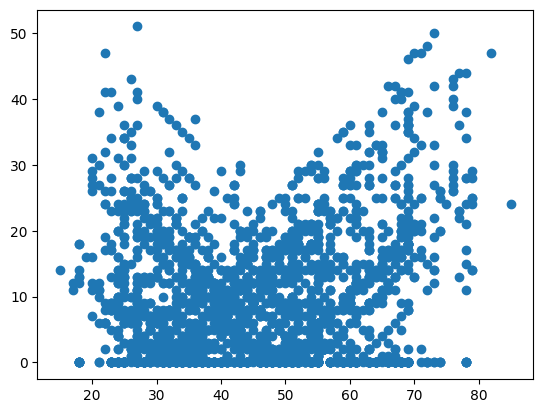

In [ ]:
age_gap = []
l = len(list(predictions_age))
for i in range(l):
  age_gap.append(abs(predicted_age[i] - list(y_test_age['age'])[i]))
print(age_gap)

display(plt.scatter(y_test_age, age_gap))

from scipy.stats import pearsonr
rsq, p = pearsonr(list(y_test_age['age']), age_gap)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(list(y_test_age['age']), age_gap)
print(rsq, p)

In [ ]:
import pickle
from google.colab import files

with open("SVMAge.pkl", "wb") as f:
    pickle.dump(model, f)
    files.download("SVMAge.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# SVM gender
y = y_train_gender
clf = svm.SVC(probability=True)
model = clf.fit(X_scaled, y.values.ravel())


scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), verbose = 100)


print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))

[CV] START .....................................................................
[CV] END ................................ score: (test=0.925) total time=  24.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   24.8s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.934) total time=  11.3s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:   36.1s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.939) total time=  12.7s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:   48.9s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.928) total time=  12.6s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:  1.0min
[CV] START .....................................................................
[CV] END ..................

In [ ]:
predicted_gender = model.predict(X_test_scaled)
print(list(predicted_gender))
print(list(y_test_gender['gender']))
confusion_matrix = [[0, 0], [0, 0]]
l = len(predicted_gender)
for i in range(l):
  if list(predicted_gender)[i] == 'm' and list(y_test_gender['gender'])[i] == 'm':
    confusion_matrix[0][0] += 1
  elif list(predicted_gender)[i] == 'f' and list(y_test_gender['gender'])[i] == 'f':
    confusion_matrix[1][1] += 1
  elif list(predicted_gender)[i] == 'm' and list(y_test_gender['gender'])[i] == 'f':
    confusion_matrix[0][1] += 1
  else:
    confusion_matrix[1][0] += 1
print(confusion_matrix[0])
print(confusion_matrix[1])

['m', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'f', 'm', 'm', 'm', 'f', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'f', 'f', 'm', 'm', 'm', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'f', 'm', 'f', 'f', 'f', 'm', 'm', 'f', 'm', 'm', 'm', 'm', 'f', 'm', 'f', 'm', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'f', 'f', 'm', 'f', 'm', 'f', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'f', 'm', 'f', 'f', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'f', 'm', 'm', 'm', 'm', 'f', 'm', 'f', 'f', 'f', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'f', 'm', 'f', 'm', 'f', 'm', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'm',

In [ ]:
import pickle
from google.colab import files

with open("SVMGender.pkl", "wb") as f:
    pickle.dump(model, f)
    files.download("SVMGender.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Optimized Random Forrest Age

In [ ]:
# Random Forrest age
y = y_train_age
clf = RandomForestClassifier(random_state = 0 , n_estimators=500)
model = clf.fit(X_scaled, y.values.ravel())#y)

scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), verbose=100)

print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))

[CV] START .....................................................................
[CV] END ................................ score: (test=0.492) total time= 1.6min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.6min
[CV] START .....................................................................
[CV] END ................................ score: (test=0.486) total time= 1.6min
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  3.2min
[CV] START .....................................................................
[CV] END ................................ score: (test=0.491) total time= 1.6min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  4.8min
[CV] START .....................................................................
[CV] END ................................ score: (test=0.509) total time= 1.5min
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:  6.3min
[CV] START .....................................................................
[CV] END ..................

In [ ]:
predicted_age = model.predict(X_test_scaled)
print(list(predicted_age))
print(list(y_test_age['age']))

[31, 36, 67, 25, 55, 45, 69, 51, 35, 28, 31, 54, 49, 65, 28, 35, 52, 39, 67, 31, 55, 47, 57, 59, 54, 48, 40, 50, 59, 72, 51, 57, 31, 46, 48, 36, 50, 44, 30, 38, 44, 68, 59, 55, 39, 55, 54, 73, 51, 48, 33, 61, 55, 49, 55, 44, 23, 28, 41, 59, 38, 66, 54, 51, 40, 18, 29, 69, 48, 63, 36, 50, 28, 44, 68, 46, 65, 46, 39, 28, 63, 32, 51, 31, 32, 63, 49, 29, 46, 37, 18, 47, 38, 65, 23, 54, 40, 59, 64, 28, 47, 44, 31, 41, 50, 31, 29, 35, 37, 24, 51, 32, 46, 23, 38, 36, 50, 69, 24, 35, 55, 39, 56, 31, 48, 24, 24, 34, 51, 63, 54, 31, 59, 32, 31, 54, 24, 50, 32, 63, 57, 35, 38, 69, 47, 55, 63, 51, 50, 33, 28, 61, 51, 43, 43, 31, 62, 32, 30, 61, 25, 35, 69, 46, 32, 41, 63, 73, 43, 41, 55, 46, 54, 63, 49, 68, 40, 59, 43, 47, 50, 59, 66, 73, 29, 50, 46, 30, 49, 67, 47, 39, 35, 27, 36, 20, 43, 44, 38, 33, 69, 25, 52, 28, 48, 36, 43, 45, 54, 40, 35, 54, 44, 27, 46, 54, 38, 54, 37, 63, 25, 49, 32, 52, 52, 46, 31, 50, 57, 26, 24, 28, 55, 61, 51, 59, 39, 34, 55, 32, 63, 58, 36, 52, 36, 24, 47, 46, 64, 34,

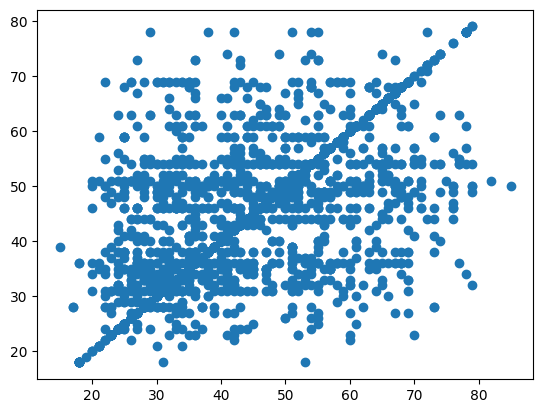

In [ ]:
display(plt.scatter(list(y_test_age['age']), predicted_age))

In [ ]:
from scipy.stats import pearsonr
rsq, p = pearsonr(list(y_test_age['age']), predicted_age)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(list(y_test_age['age']), predicted_age)
print(rsq, p)

0.6366874163580984 2.149869853299097e-290
0.6386736416893857 9.231381019737161e-293


In [ ]:
from sklearn import metrics
# MAE
print(metrics.mean_absolute_error(list(y_test_age['age']), predicted_age))
# MSE
print(metrics.mean_squared_error(list(y_test_age['age']), predicted_age))
# RMSE
print(np.sqrt(metrics.mean_squared_error(list(y_test_age['age']), predicted_age)))

6.427956147220047
132.71613155833987
11.520248762867054


[0, 0, 0, 36, 0, 0, 0, 0, 3, 9, 11, 20, 21, 5, 0, 6, 0, 0, 0, 0, 26, 16, 0, 0, 0, 23, 0, 0, 34, 0, 0, 0, 0, 8, 2, 0, 15, 16, 8, 0, 9, 0, 17, 0, 0, 0, 0, 6, 0, 3, 7, 0, 14, 6, 9, 15, 0, 9, 0, 0, 0, 25, 0, 16, 0, 13, 2, 39, 1, 0, 30, 0, 45, 0, 14, 13, 0, 11, 6, 3, 0, 0, 0, 5, 0, 13, 8, 29, 3, 12, 0, 5, 2, 0, 13, 0, 8, 14, 4, 0, 0, 22, 12, 14, 2, 8, 0, 25, 15, 9, 12, 8, 19, 0, 4, 32, 1, 12, 0, 0, 0, 2, 0, 3, 0, 0, 10, 0, 19, 0, 19, 12, 4, 0, 2, 8, 30, 0, 0, 0, 5, 10, 0, 11, 0, 30, 0, 25, 0, 1, 0, 25, 15, 0, 17, 0, 9, 28, 0, 0, 0, 6, 0, 6, 0, 6, 14, 0, 0, 0, 0, 11, 0, 34, 12, 0, 0, 0, 0, 0, 13, 31, 0, 20, 0, 17, 17, 2, 0, 0, 0, 0, 0, 6, 0, 0, 13, 4, 9, 9, 35, 0, 0, 0, 20, 0, 2, 20, 13, 0, 22, 1, 5, 0, 15, 20, 27, 3, 14, 0, 11, 19, 0, 1, 0, 1, 0, 12, 0, 24, 0, 26, 5, 17, 0, 0, 16, 4, 0, 1, 0, 0, 24, 0, 9, 0, 7, 4, 0, 12, 0, 18, 16, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 7, 0, 8, 9, 6, 0, 9, 0, 18, 0, 0, 3, 0, 16, 0, 0, 0, 22, 0, 10, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 9, 6, 0, 0, 0, 0, 11, 29,

0.02508183917227416 0.20510430430712237
-0.035958468243168784 0.06922703453603546


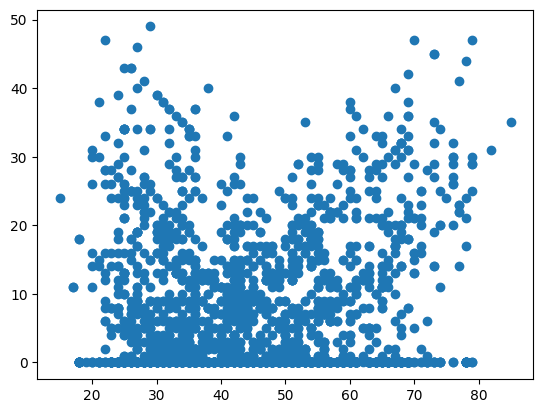

In [ ]:
age_gap = []
l = len(list(predicted_age))
for i in range(l):
  age_gap.append(abs(predicted_age[i] - list(y_test_age['age'])[i]))
print(age_gap)

display(plt.scatter(y_test_age, age_gap))

from scipy.stats import pearsonr
rsq, p = pearsonr(list(y_test_age['age']), age_gap)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(list(y_test_age['age']), age_gap)
print(rsq, p)


In [ ]:
import pickle
from google.colab import files

with open("OptRandForAge.pkl", "wb") as f:
    pickle.dump(model, f)
    files.download("OptRandForAge.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Pretrained RandomForrestAge

In [ ]:
# upload the model from local files first
with open("RandomForrestAge.pkl", "rb") as f:
  model = pickle.load(f)
# 54% acc while training

In [ ]:
predicted_age = model.predict(X_test_scaled)
print(list(predicted_age))
print(list(y_test_age['age']))

l = len(list(predicted_age))
correct = 0
for i in range(l):
  if list(predicted_age)[i] == list(y_test_age['age'])[i]:
    correct += 1
print("Accuracy:", correct/l)

[31, 36, 67, 25, 55, 45, 47, 51, 31, 40, 31, 74, 49, 36, 28, 28, 52, 39, 40, 31, 28, 31, 51, 59, 54, 32, 40, 50, 59, 72, 51, 57, 31, 46, 34, 36, 36, 57, 46, 38, 61, 68, 59, 55, 39, 55, 54, 40, 51, 48, 57, 61, 55, 49, 55, 40, 23, 28, 41, 59, 38, 66, 54, 51, 40, 18, 29, 67, 48, 63, 67, 50, 28, 33, 68, 46, 68, 46, 40, 28, 63, 32, 51, 31, 32, 48, 51, 29, 54, 37, 18, 36, 38, 49, 23, 54, 40, 68, 68, 28, 47, 44, 31, 32, 50, 31, 29, 35, 37, 24, 51, 51, 27, 23, 38, 36, 50, 69, 24, 35, 55, 39, 56, 34, 48, 24, 24, 34, 51, 63, 54, 36, 49, 31, 31, 54, 25, 50, 32, 63, 38, 35, 38, 43, 47, 55, 63, 59, 50, 51, 28, 61, 51, 43, 43, 31, 62, 32, 30, 61, 25, 34, 69, 52, 32, 38, 63, 38, 21, 41, 55, 46, 54, 63, 49, 68, 40, 59, 43, 47, 54, 44, 66, 24, 29, 47, 46, 30, 49, 67, 47, 39, 35, 27, 36, 34, 54, 44, 38, 33, 69, 25, 52, 28, 48, 36, 50, 45, 54, 46, 35, 54, 44, 27, 31, 54, 42, 51, 34, 63, 25, 51, 32, 52, 52, 36, 31, 33, 57, 26, 24, 28, 54, 33, 51, 59, 39, 34, 55, 30, 63, 58, 60, 52, 36, 24, 51, 46, 64, 28,

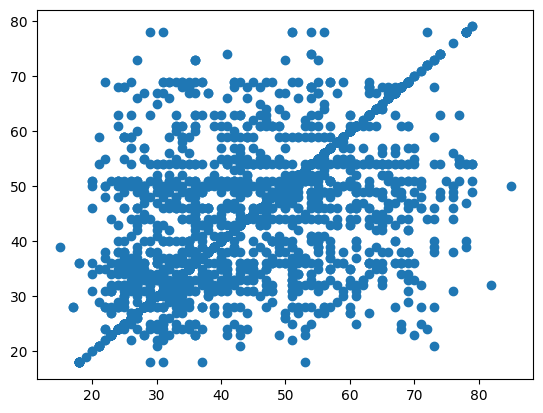

In [ ]:
display(plt.scatter(list(y_test_age['age']), predicted_age))

In [ ]:
from scipy.stats import pearsonr
rsq, p = pearsonr(list(y_test_age['age']), predicted_age)
print(rsq, p)

0.5966710371453524 3.5215413925338407e-246


In [ ]:
from sklearn import metrics
# MAE
print(metrics.mean_absolute_error(list(y_test_age['age']), predicted_age))
# MSE
print(metrics.mean_squared_error(list(y_test_age['age']), predicted_age))
# RMSE
print(np.sqrt(metrics.mean_squared_error(list(y_test_age['age']), predicted_age)))

6.956538762725137
147.87509788566953
12.16039053179089
